### load necessary modules

In [1]:
#env: lpr

import uproot
import awkward as ak
import vector
vector.register_awkward()
from matplotlib import pyplot as plt
import mplhep as hep
hep.style.use("CMS")
import math
import itertools
import os
from typing import Dict, List, Tuple
from numpy.typing import ArrayLike
import numpy as np
import correctionlib
import awkward as ak
import fastjet
from coffea.nanoevents.methods import vector
from coffea import nanoevents
from coffea import processor
from coffea.nanoevents.methods import candidate
from coffea.analysis_tools import Weights, PackedSelection
from hist import Hist
ak.behavior.update(vector.behavior)
import sys
# import pandas as pd


### Plot pie-chart to show the fraction of different jet types with signal samples

In [2]:
def get_dphi(events):
    pT_higgs   = events["PTj_V2_a"]
    eta_higgs  = events["Etaj_V2_a"]
    phi_higgs  = events["Phij_V2_a"]
    mass_higgs = events["Mj_V2_a"]
    pT_MET = events["MET_et"]
    eta_MET = events["Etaj_V2_a"]
    phi_MET = events["MET_phi"]
    mass_MET = ak.zeros_like(events["MET_phi"])
    vec_higgs = ak.zip({
        "pt"   : pT_higgs   ,
        "eta"  : eta_higgs  ,
        "phi"  : phi_higgs  ,
        "mass" : mass_higgs ,
    },
    with_name="PtEtaPhiMLorentzVector",
    behavior=vector.behavior,
    )
    vec_MET = ak.zip({
        "pt"   :   pT_MET   ,
        "eta"  :  eta_MET  ,
        "phi"  :  phi_MET  ,
        "mass" : mass_MET ,
    },
    with_name="PtEtaPhiMLorentzVector",
    behavior=vector.behavior,
    )
    delta_phi = np.subtract(vec_MET.phi, vec_higgs.phi)
    delta_phi = np.where(delta_phi > np.pi, delta_phi - 2*np.pi, delta_phi)
    delta_phi = np.where(delta_phi < -np.pi, delta_phi + 2*np.pi, delta_phi)
    delta_phi = np.abs(delta_phi)
    print(delta_phi)
    events["DPhi"] = delta_phi

[2.4, 1.87, 3.06, 3.04, 2.91, 1.51, 2.08, ... 3.09, 0.722, 3, 3.11, 3.07, 0.455]


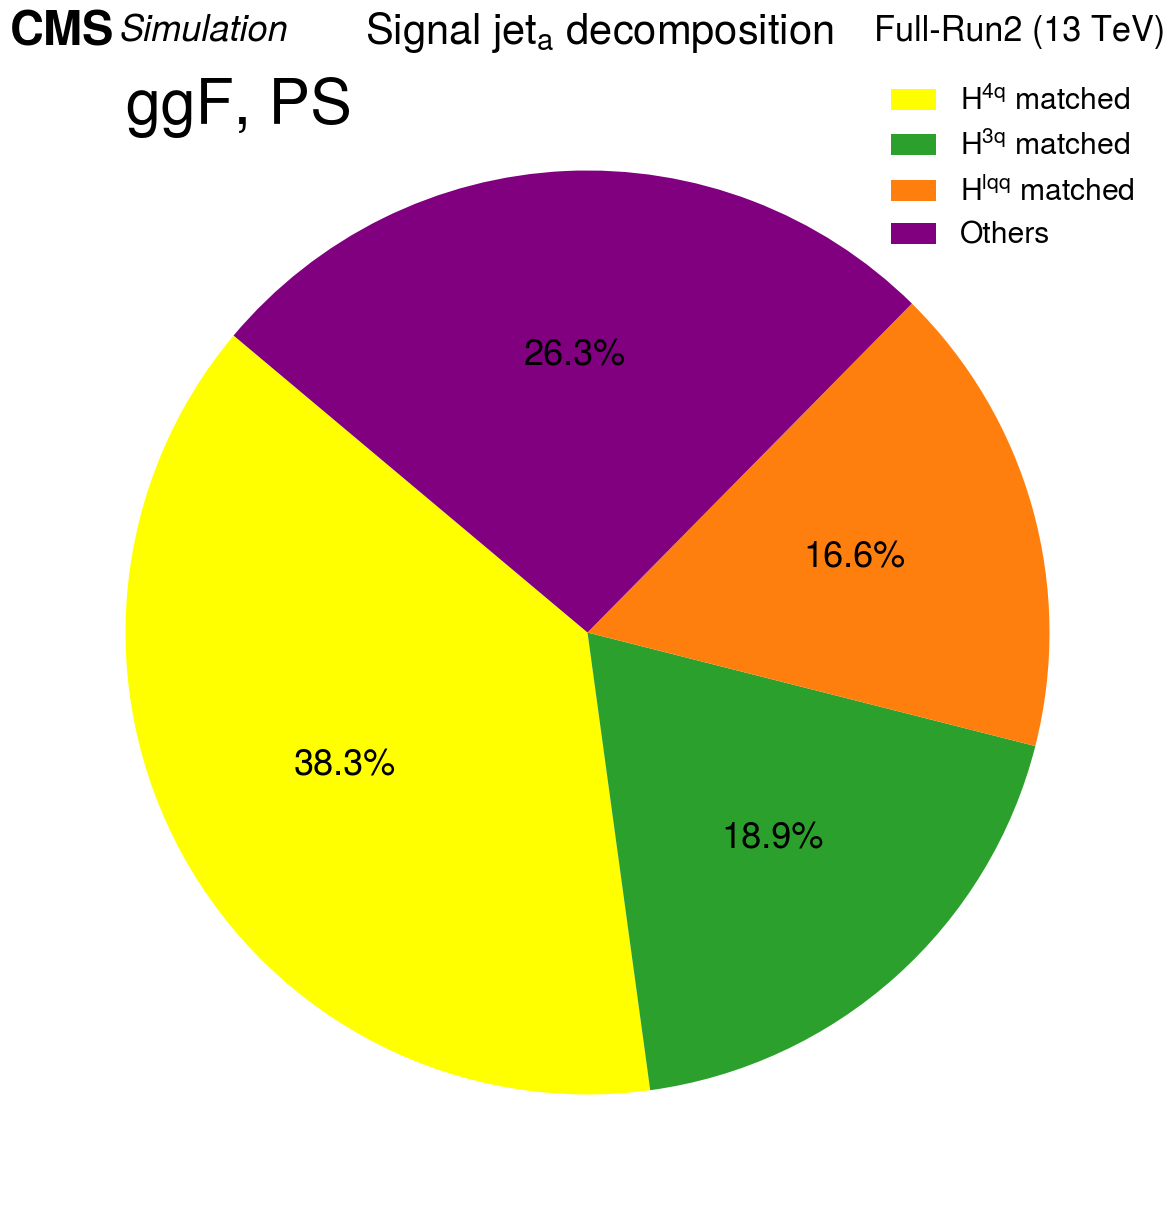

[0.168, 1.39, 2.76, 1.26, 0.0118, 2.83, ... 3.1, 0.141, 0.273, 0.498, 1.18, 2.73]


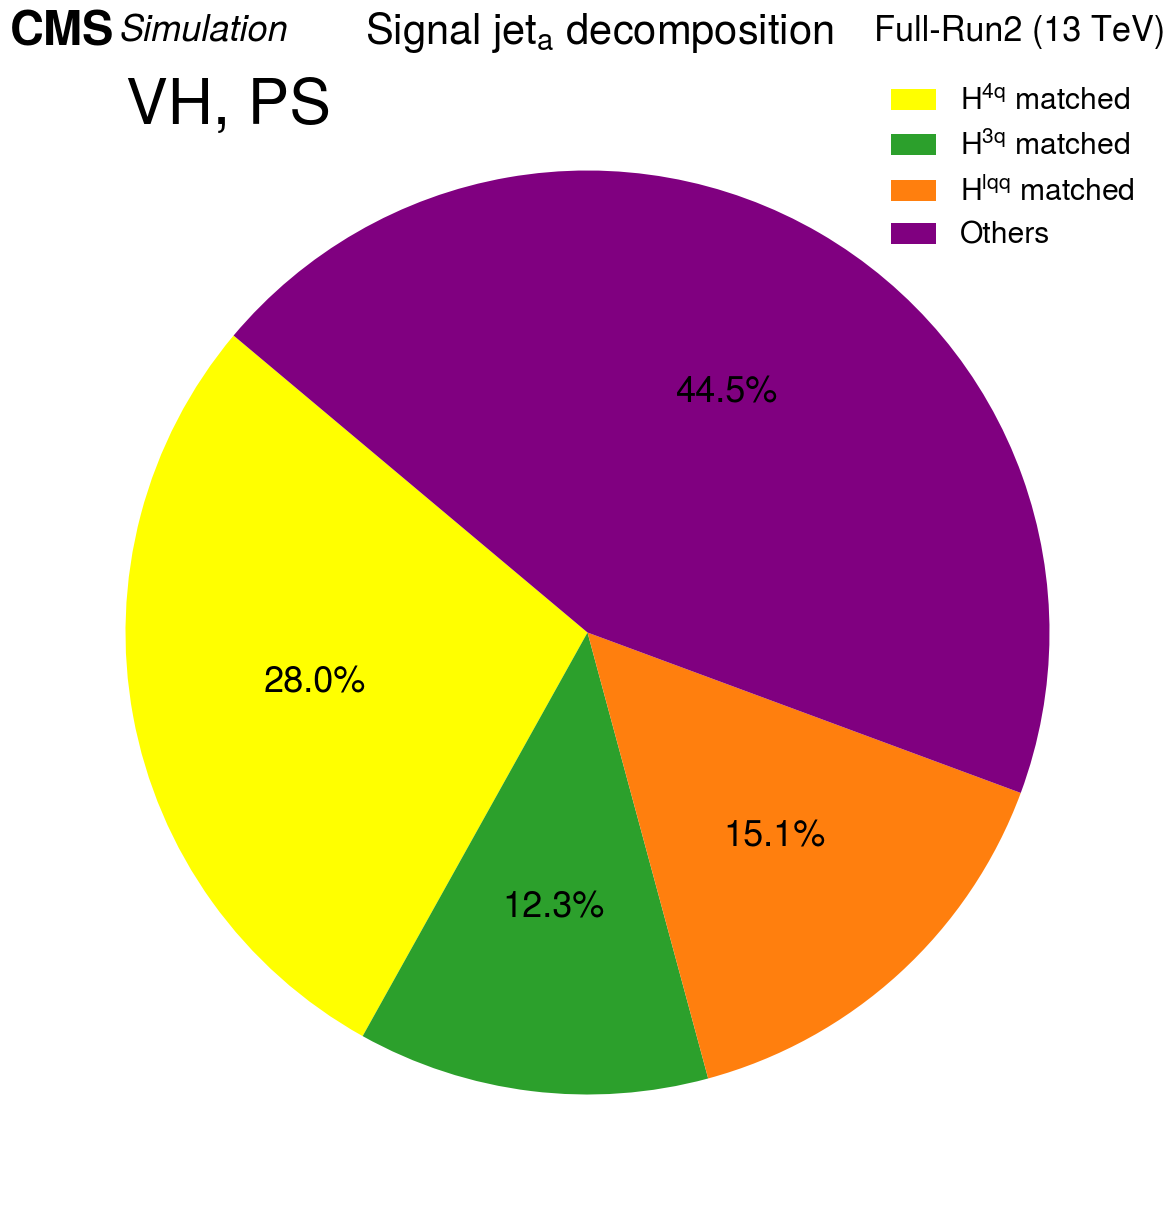

[3.12, 2.62, 2.28, 2.03, 0.0168, 0.16, ... 0.743, 0.839, 2.31, 2.44, 2.99, 0.506]


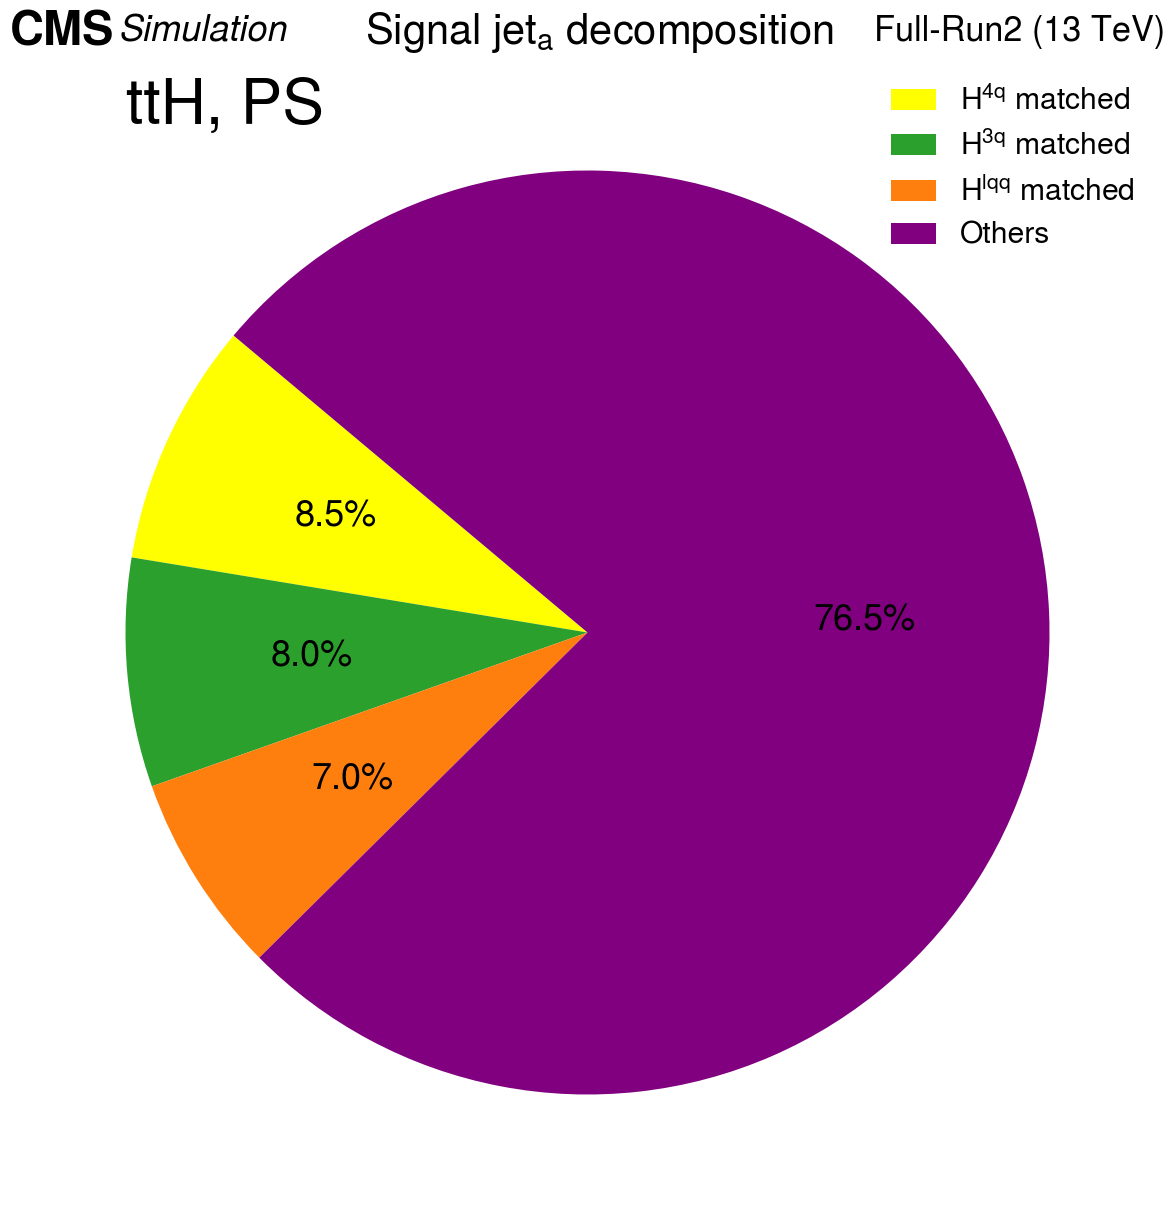

[2.97, 2.31, 0.0849, 0.17, 0.0194, 0.481, ... 1.13, 0.332, 2.5, 2.82, 2.01, 2.45]


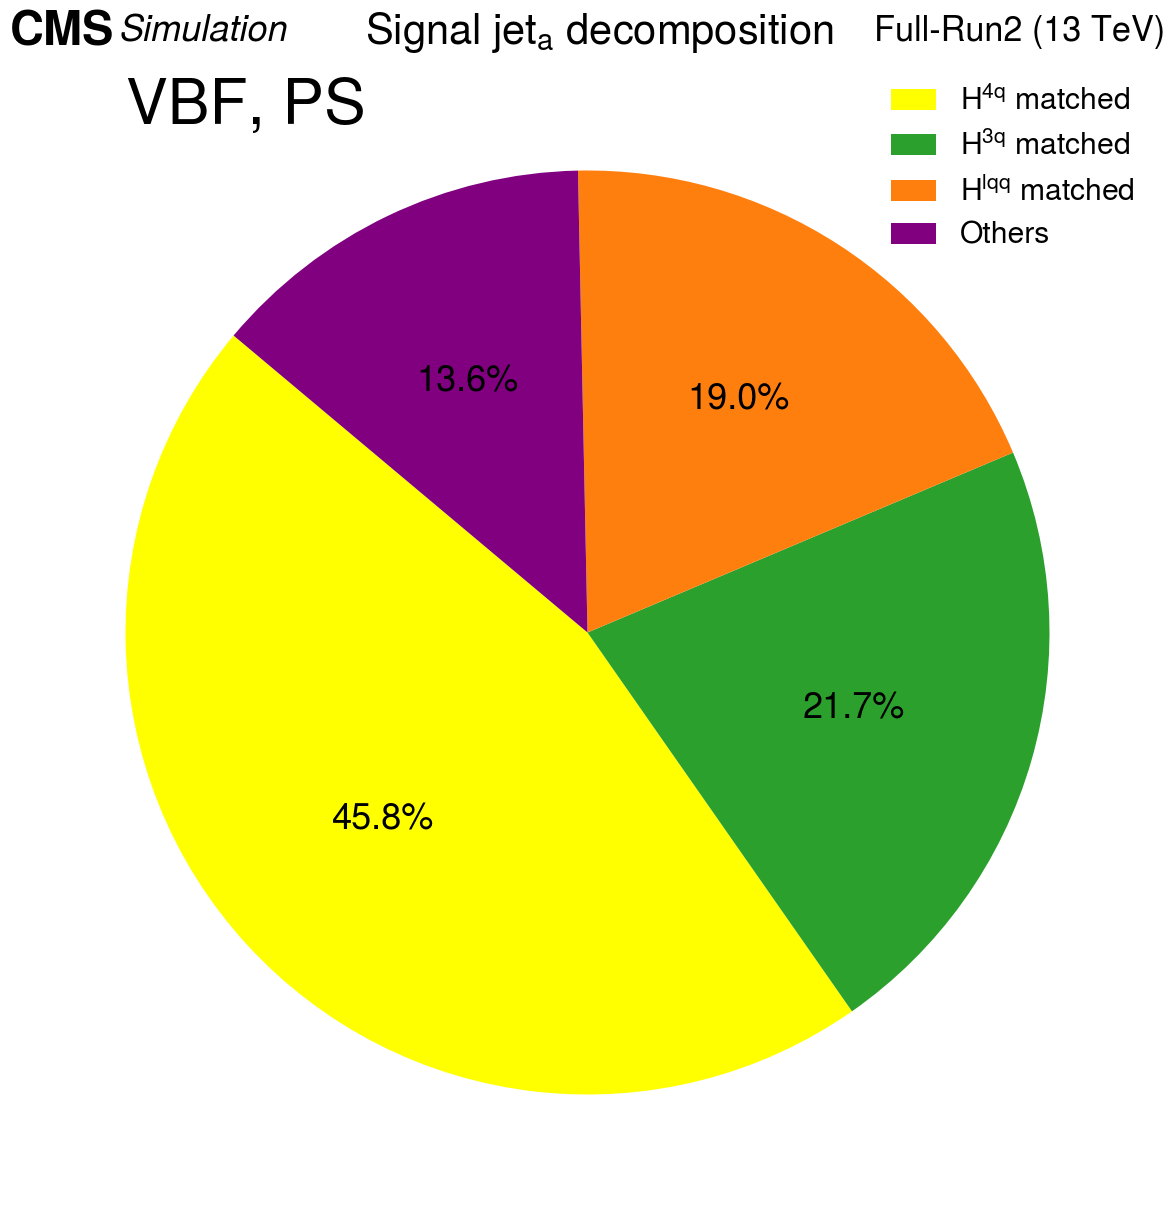

[2.4, 1.87, 3.06, 3.04, 2.91, 1.51, 2.08, ... 3.1, 0.141, 0.273, 0.498, 1.18, 2.73]


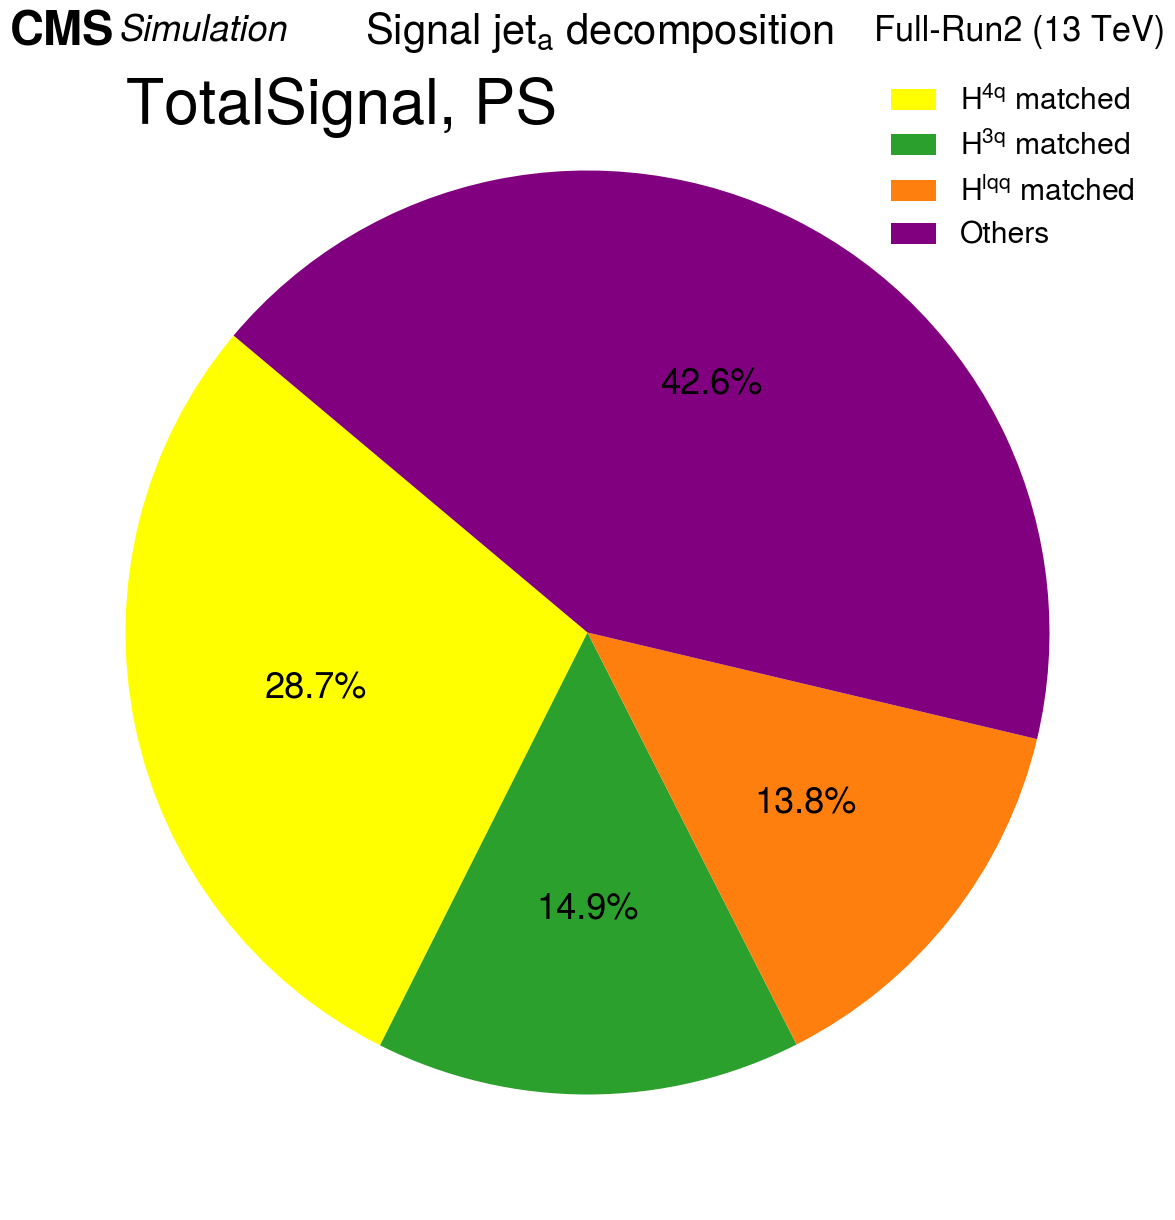

[2.4, 1.87, 3.06, 3.04, 2.91, 1.51, 2.08, ... 3.09, 0.722, 3, 3.11, 3.07, 0.455]


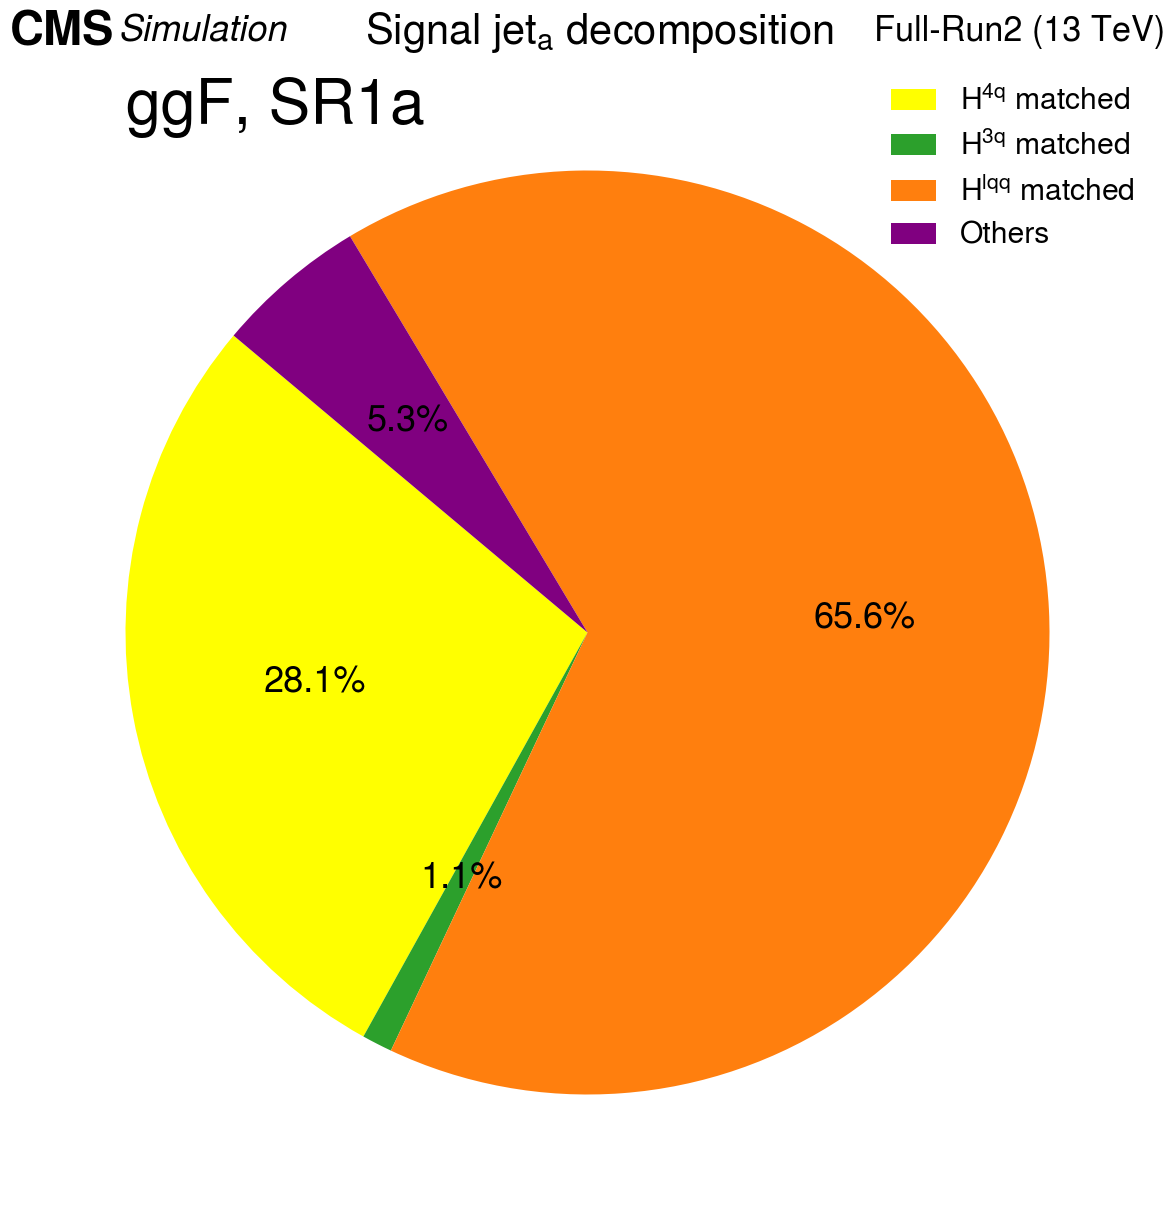

[0.168, 1.39, 2.76, 1.26, 0.0118, 2.83, ... 3.1, 0.141, 0.273, 0.498, 1.18, 2.73]


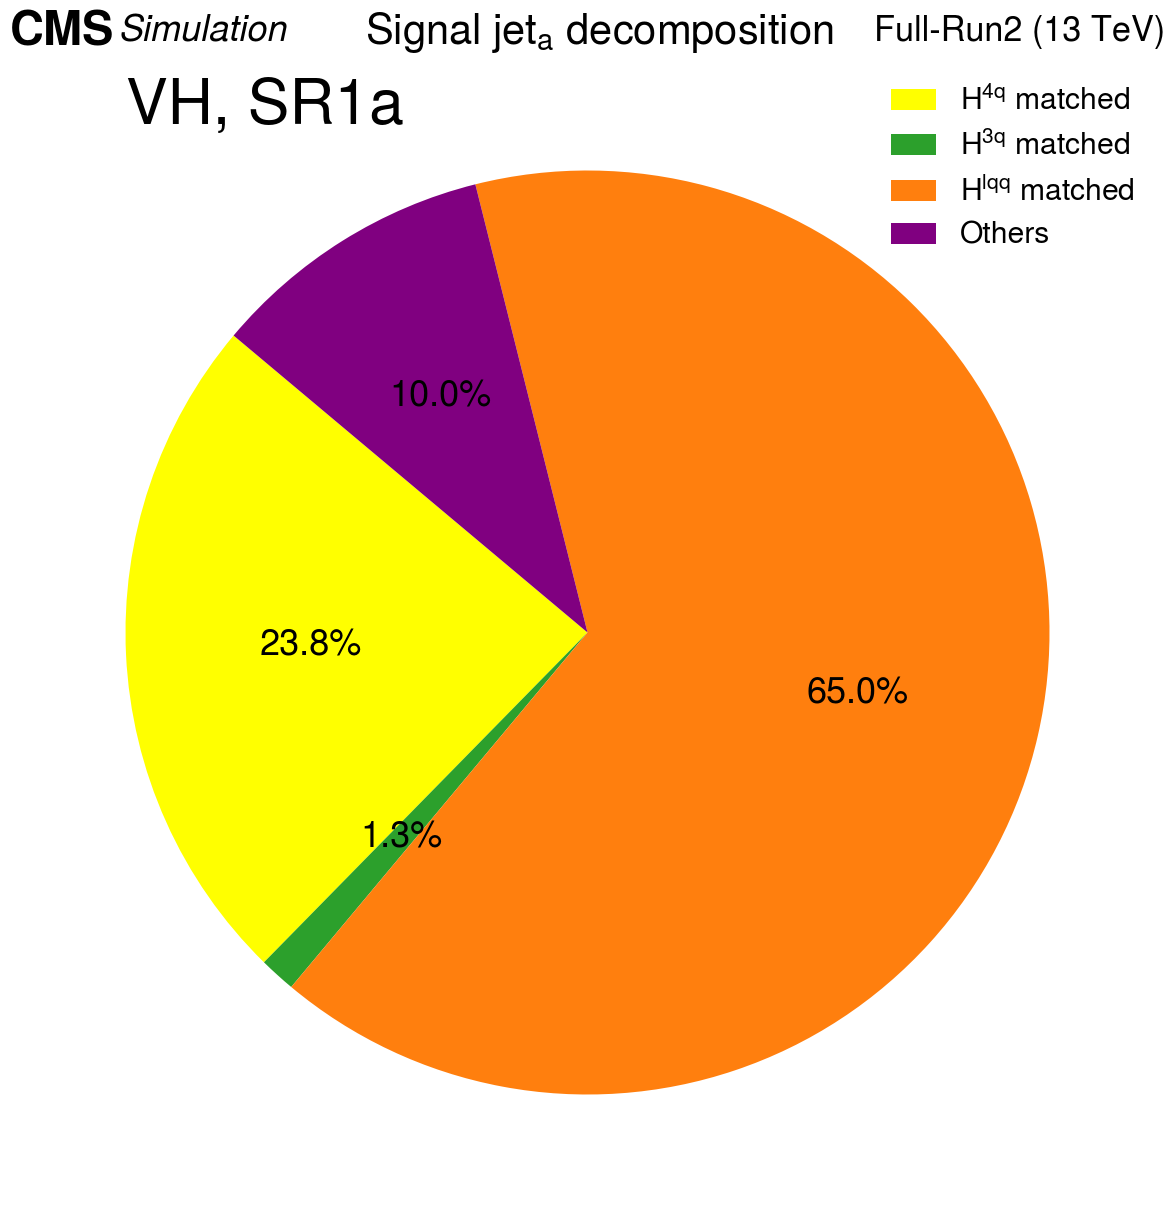

[3.12, 2.62, 2.28, 2.03, 0.0168, 0.16, ... 0.743, 0.839, 2.31, 2.44, 2.99, 0.506]


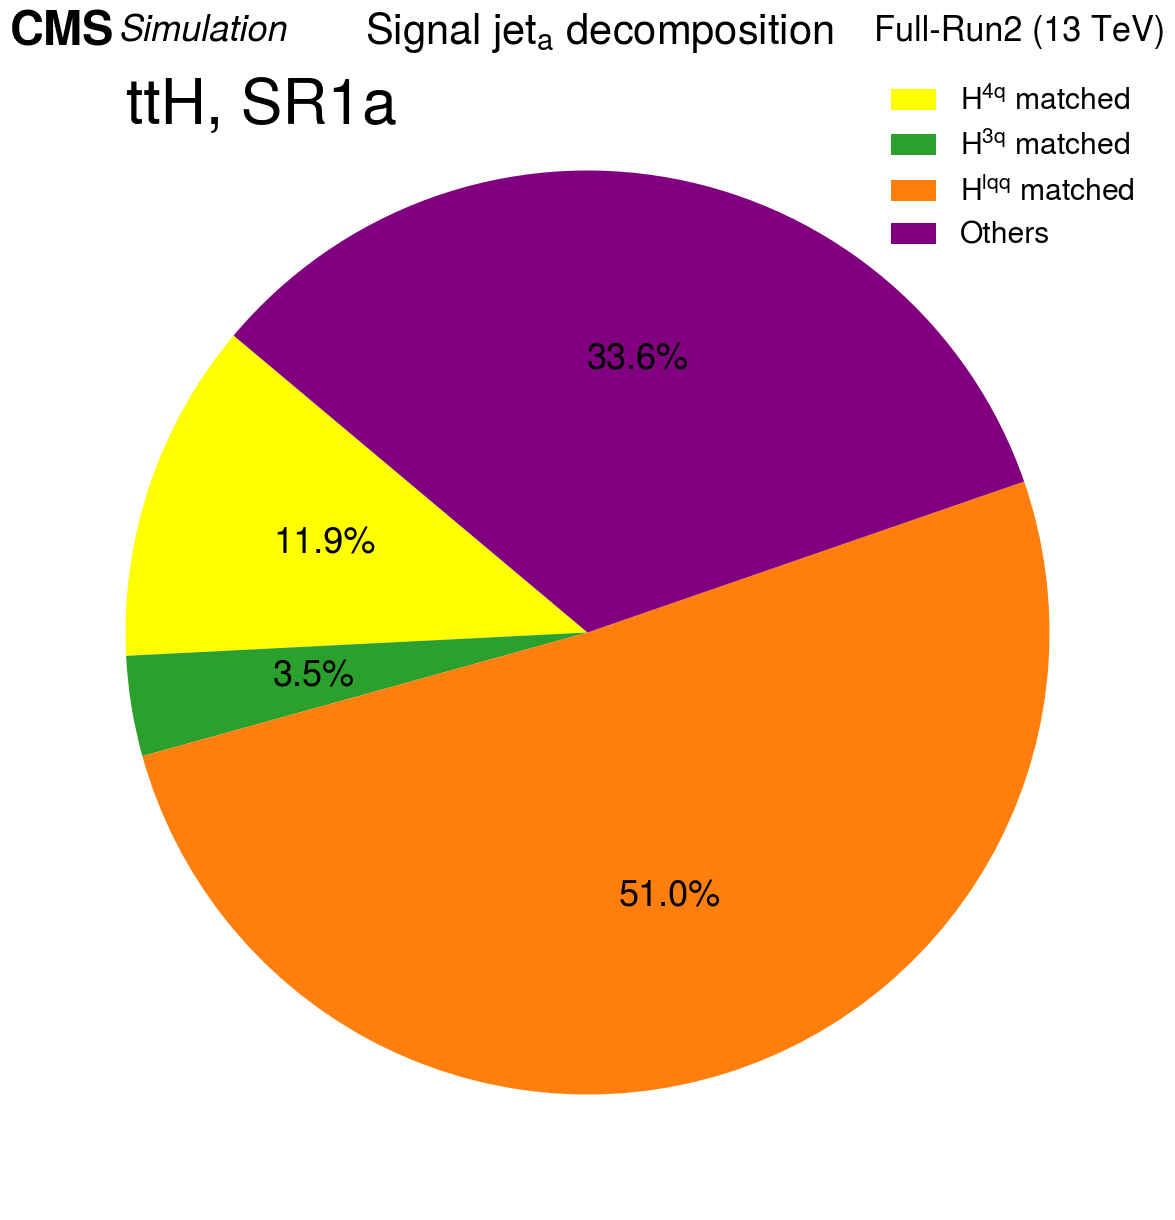

[2.97, 2.31, 0.0849, 0.17, 0.0194, 0.481, ... 1.13, 0.332, 2.5, 2.82, 2.01, 2.45]


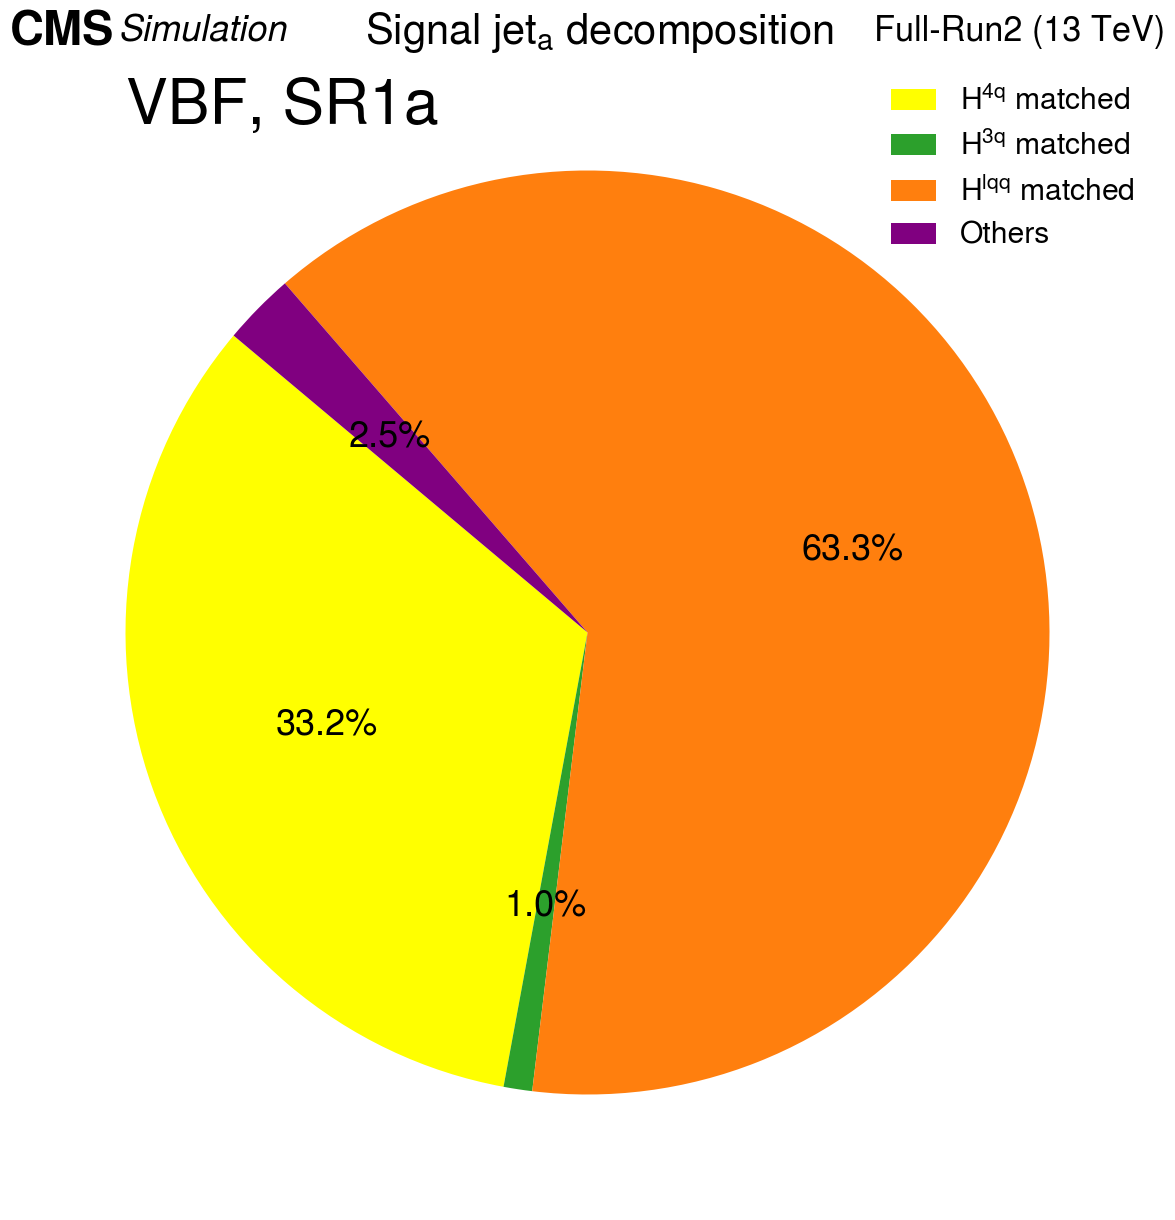

[2.4, 1.87, 3.06, 3.04, 2.91, 1.51, 2.08, ... 3.1, 0.141, 0.273, 0.498, 1.18, 2.73]


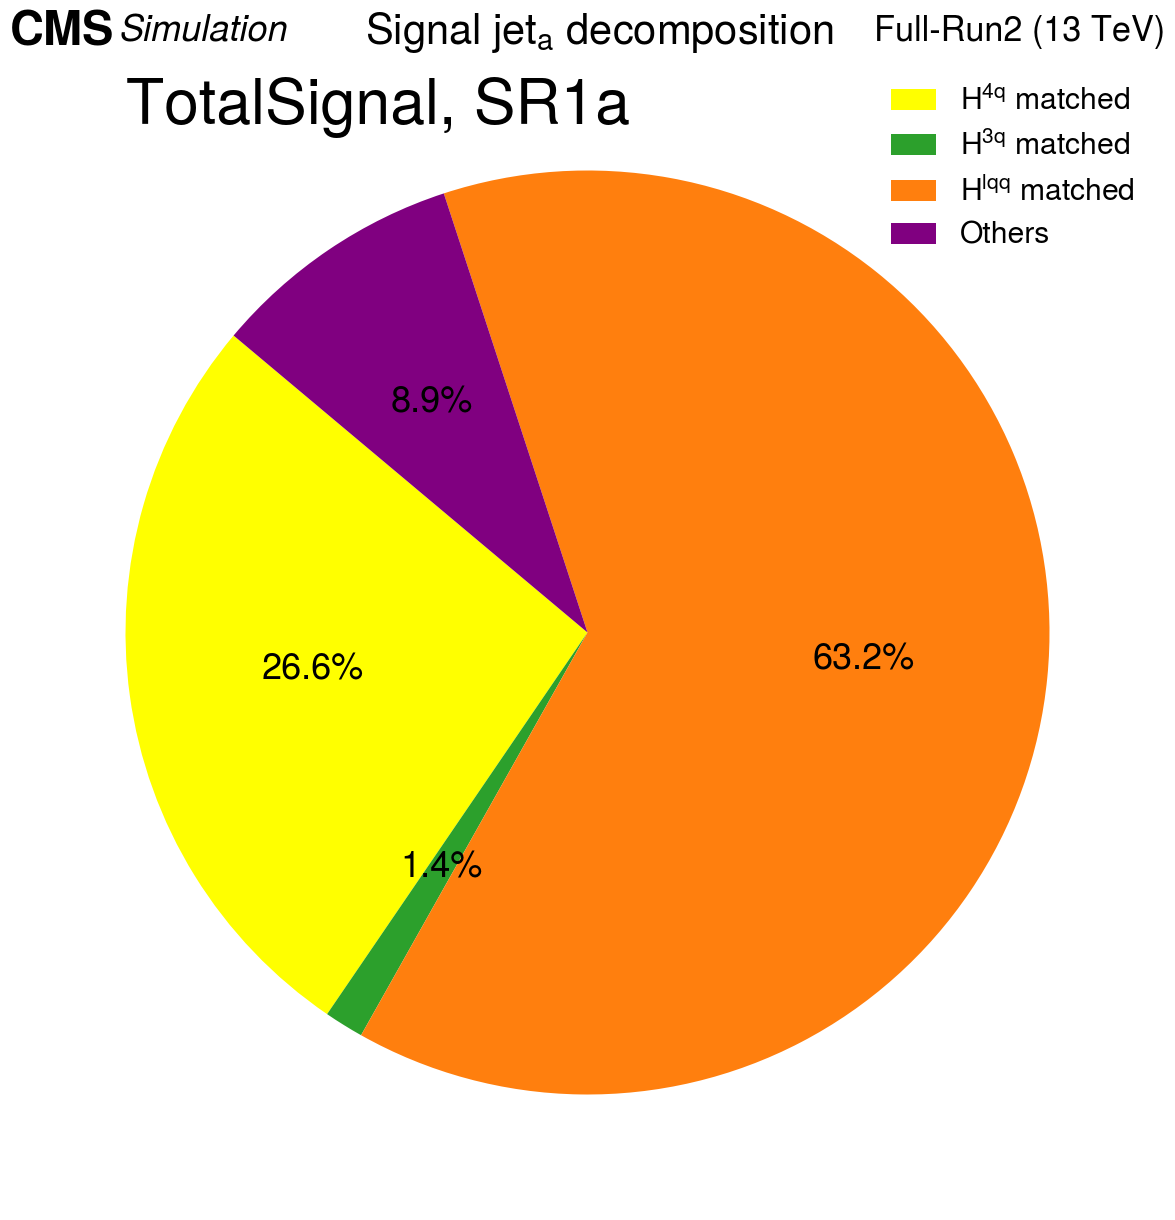

[2.4, 1.87, 3.06, 3.04, 2.91, 1.51, 2.08, ... 3.09, 0.722, 3, 3.11, 3.07, 0.455]


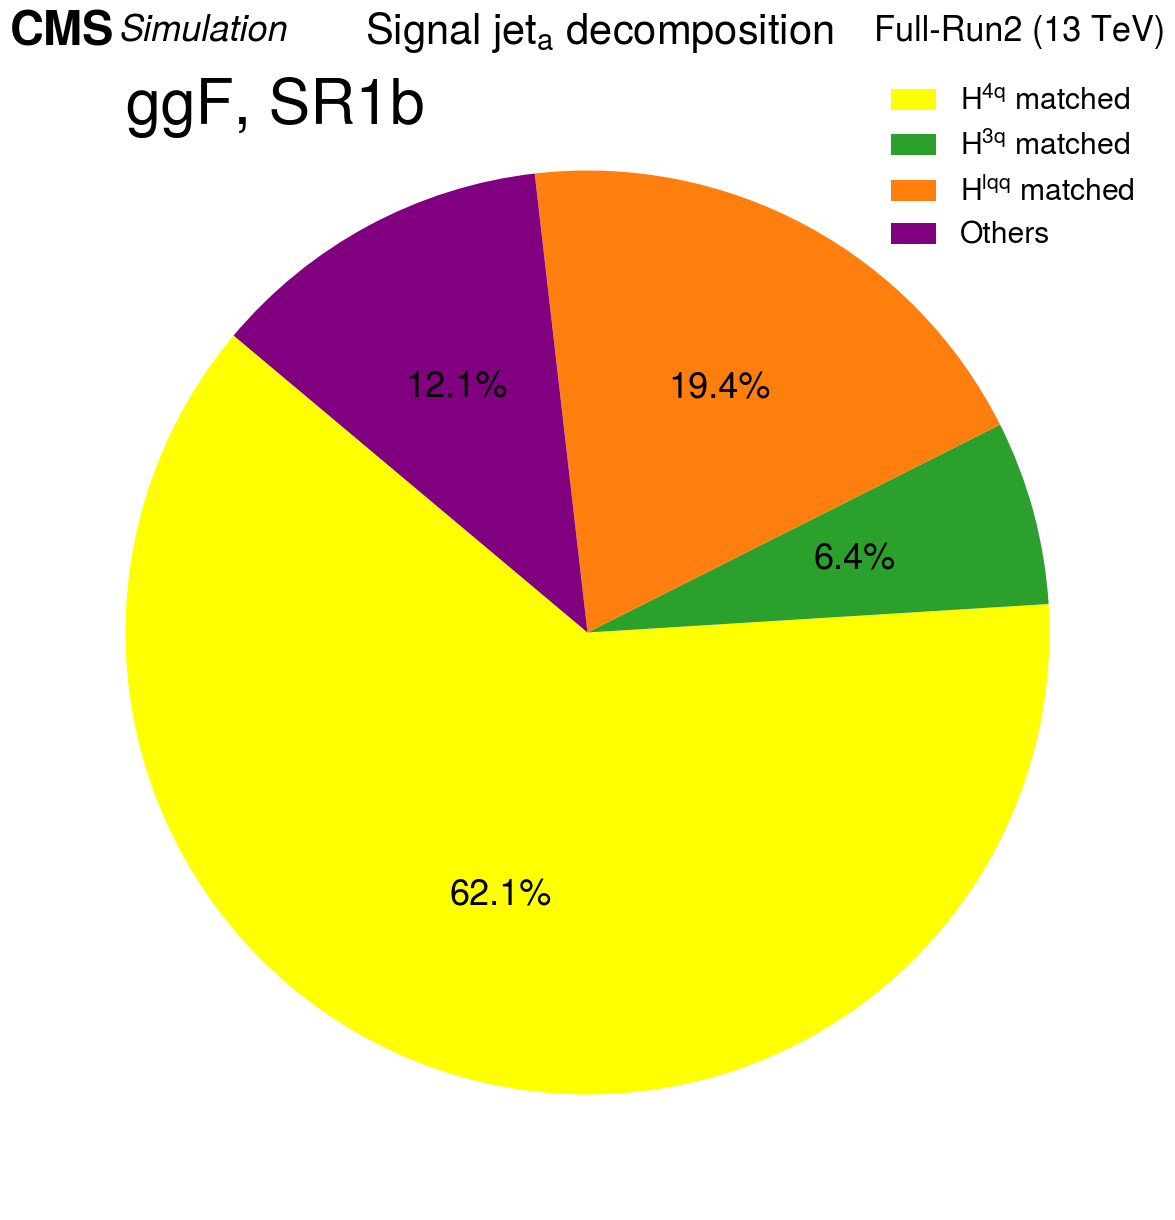

[0.168, 1.39, 2.76, 1.26, 0.0118, 2.83, ... 3.1, 0.141, 0.273, 0.498, 1.18, 2.73]


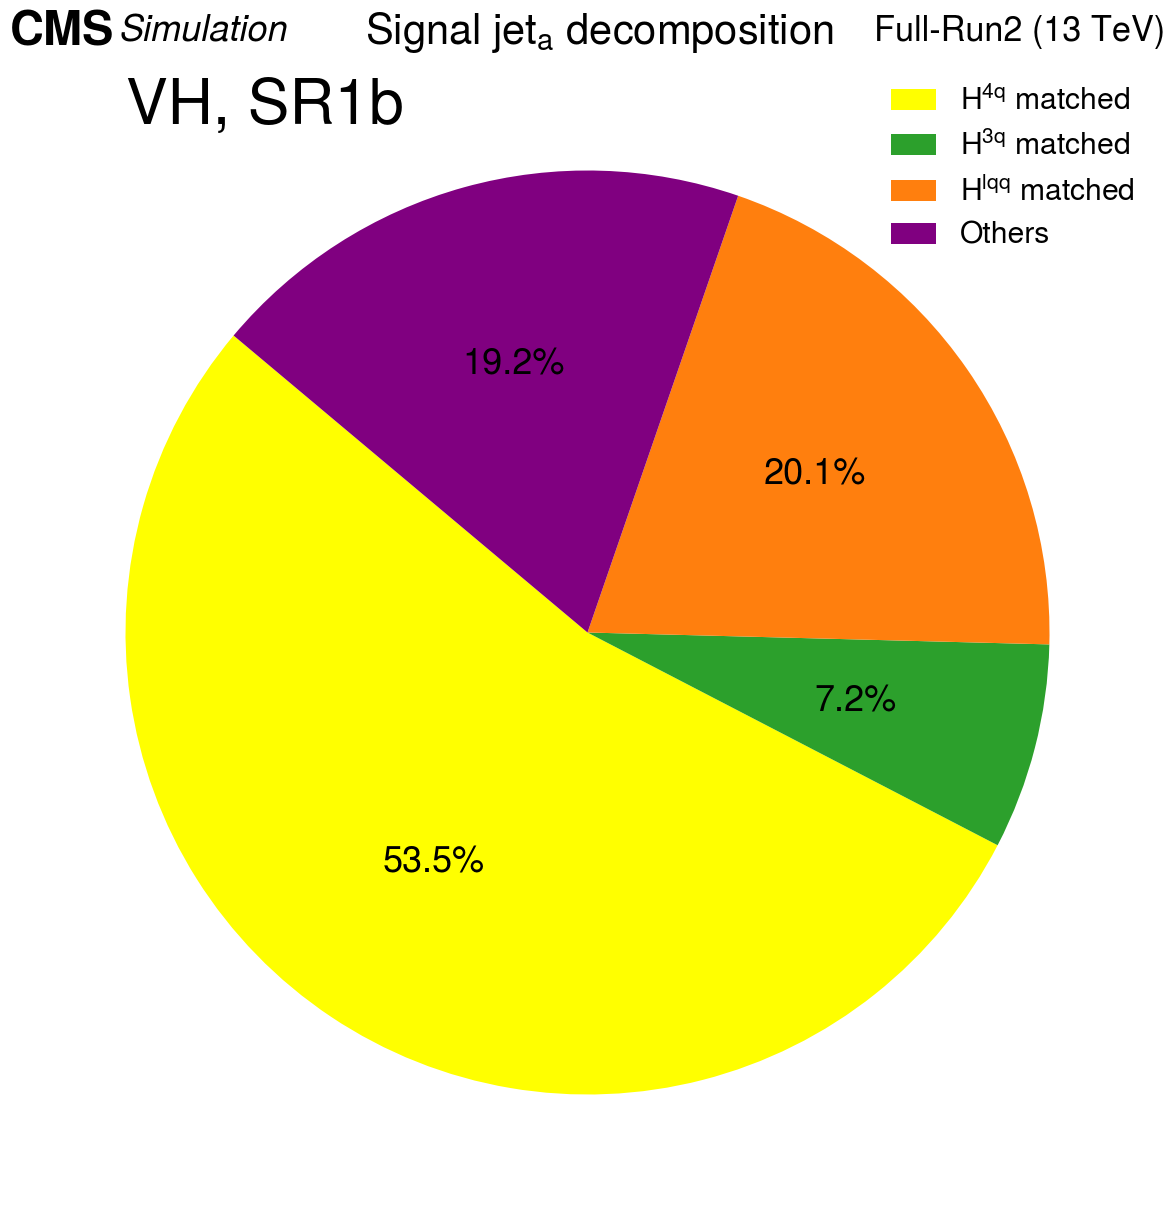

[3.12, 2.62, 2.28, 2.03, 0.0168, 0.16, ... 0.743, 0.839, 2.31, 2.44, 2.99, 0.506]


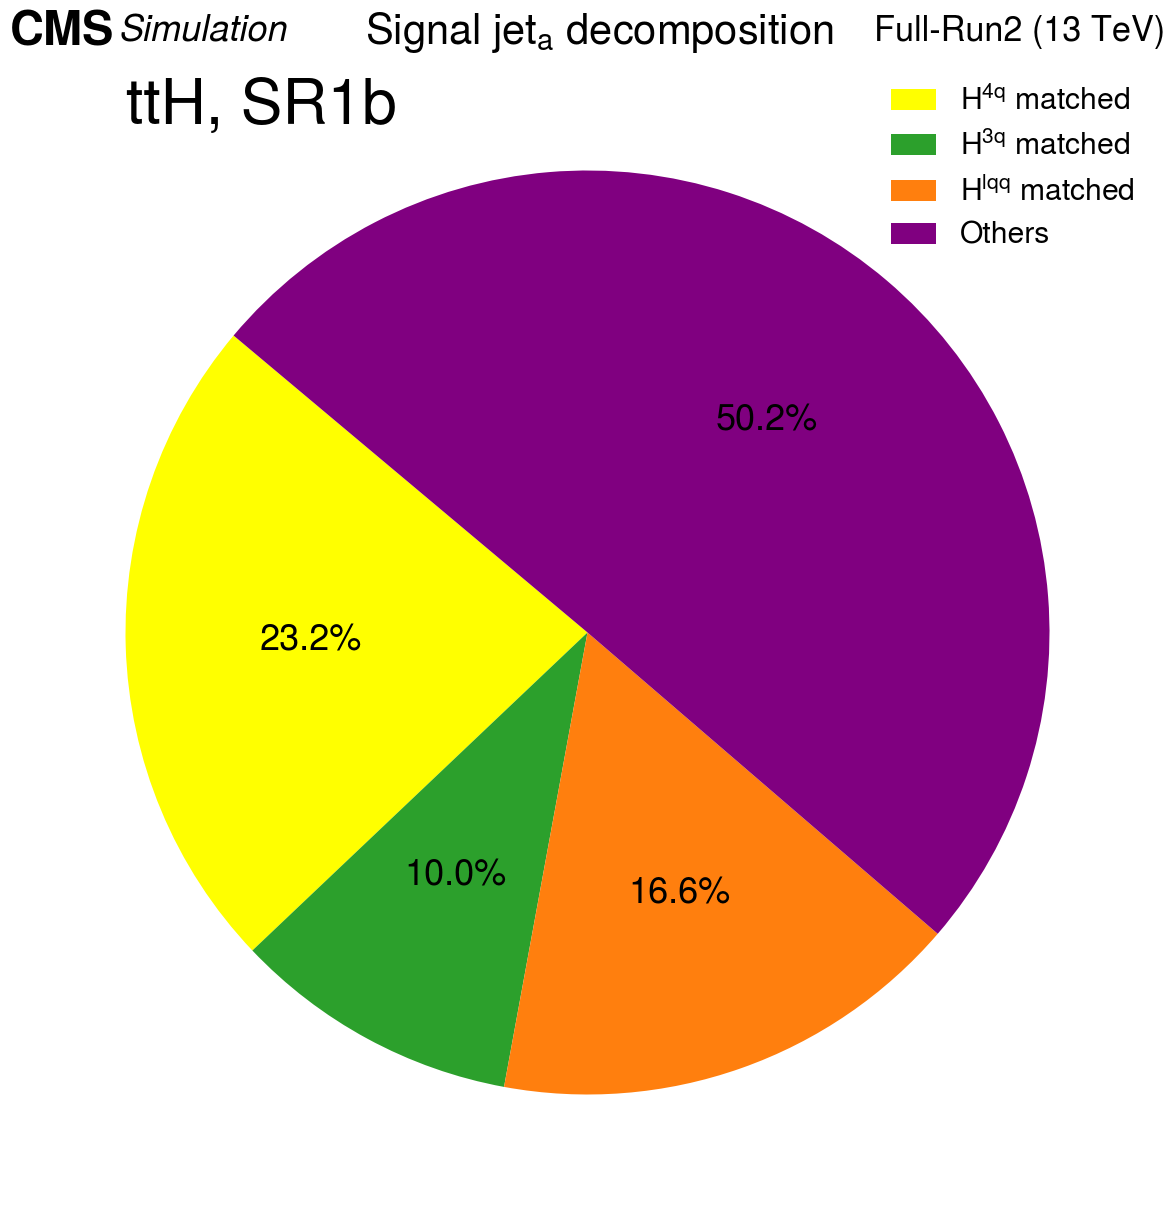

[2.97, 2.31, 0.0849, 0.17, 0.0194, 0.481, ... 1.13, 0.332, 2.5, 2.82, 2.01, 2.45]


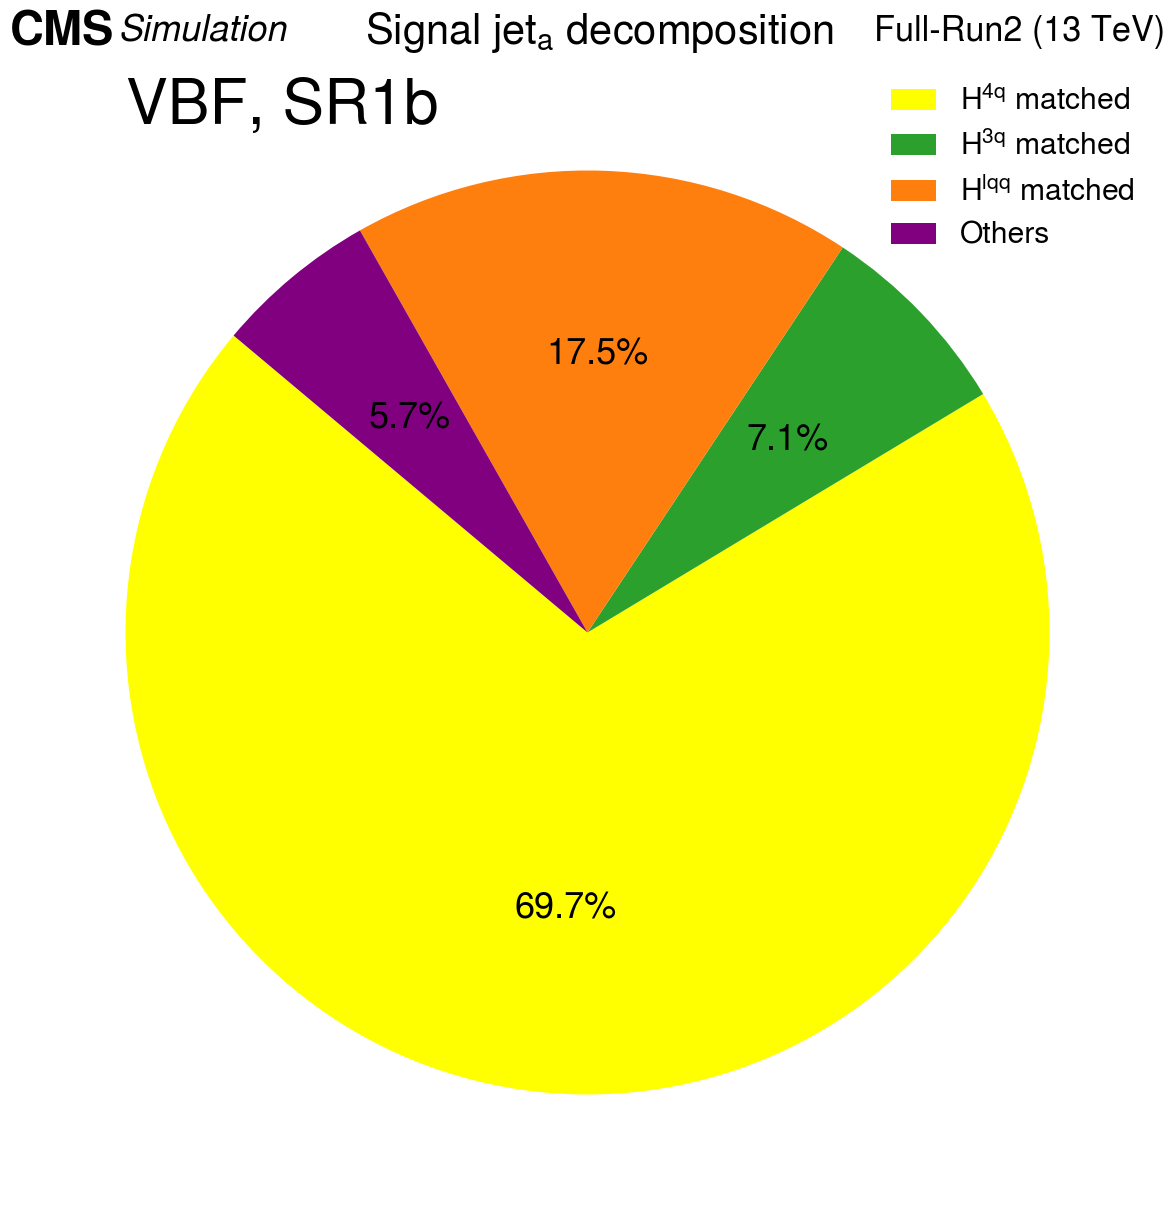

[2.4, 1.87, 3.06, 3.04, 2.91, 1.51, 2.08, ... 3.1, 0.141, 0.273, 0.498, 1.18, 2.73]


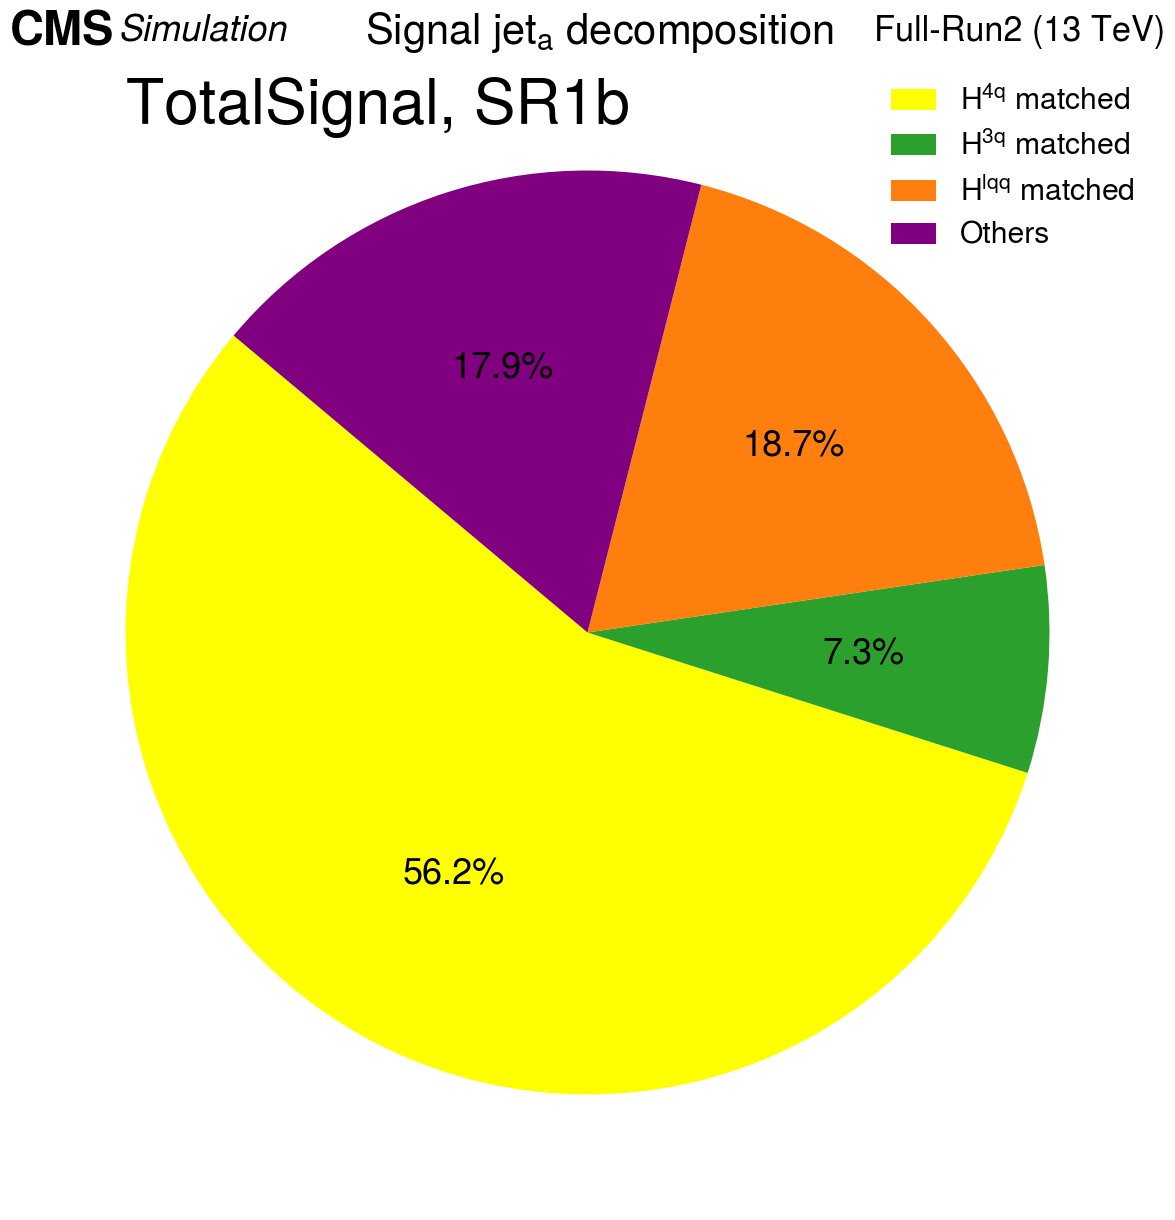

[2.4, 1.87, 3.06, 3.04, 2.91, 1.51, 2.08, ... 3.09, 0.722, 3, 3.11, 3.07, 0.455]


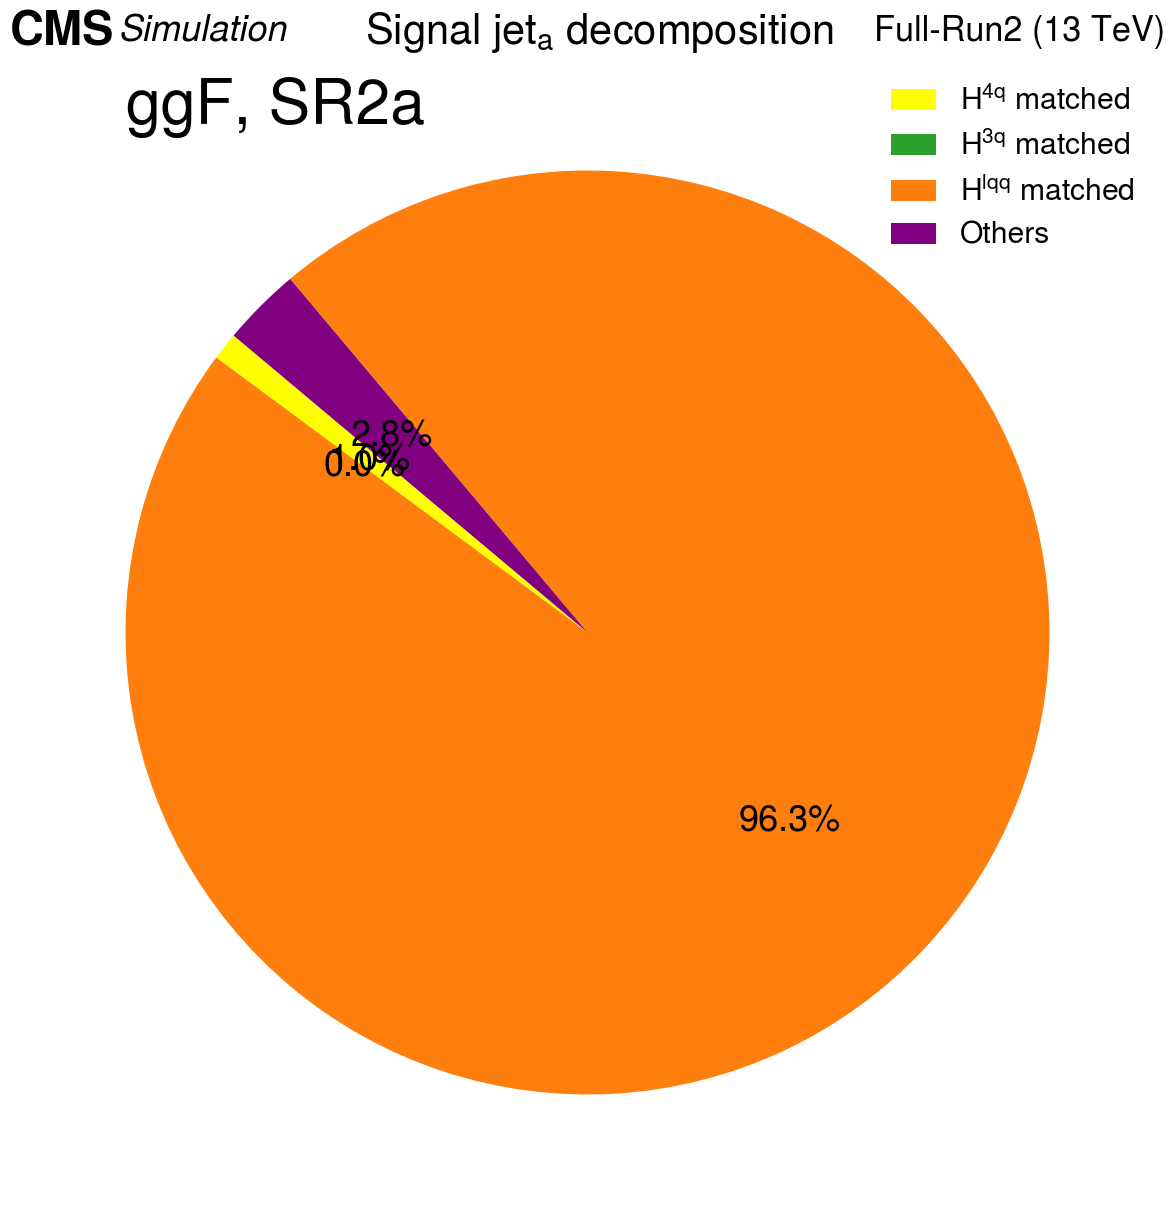

[0.168, 1.39, 2.76, 1.26, 0.0118, 2.83, ... 3.1, 0.141, 0.273, 0.498, 1.18, 2.73]


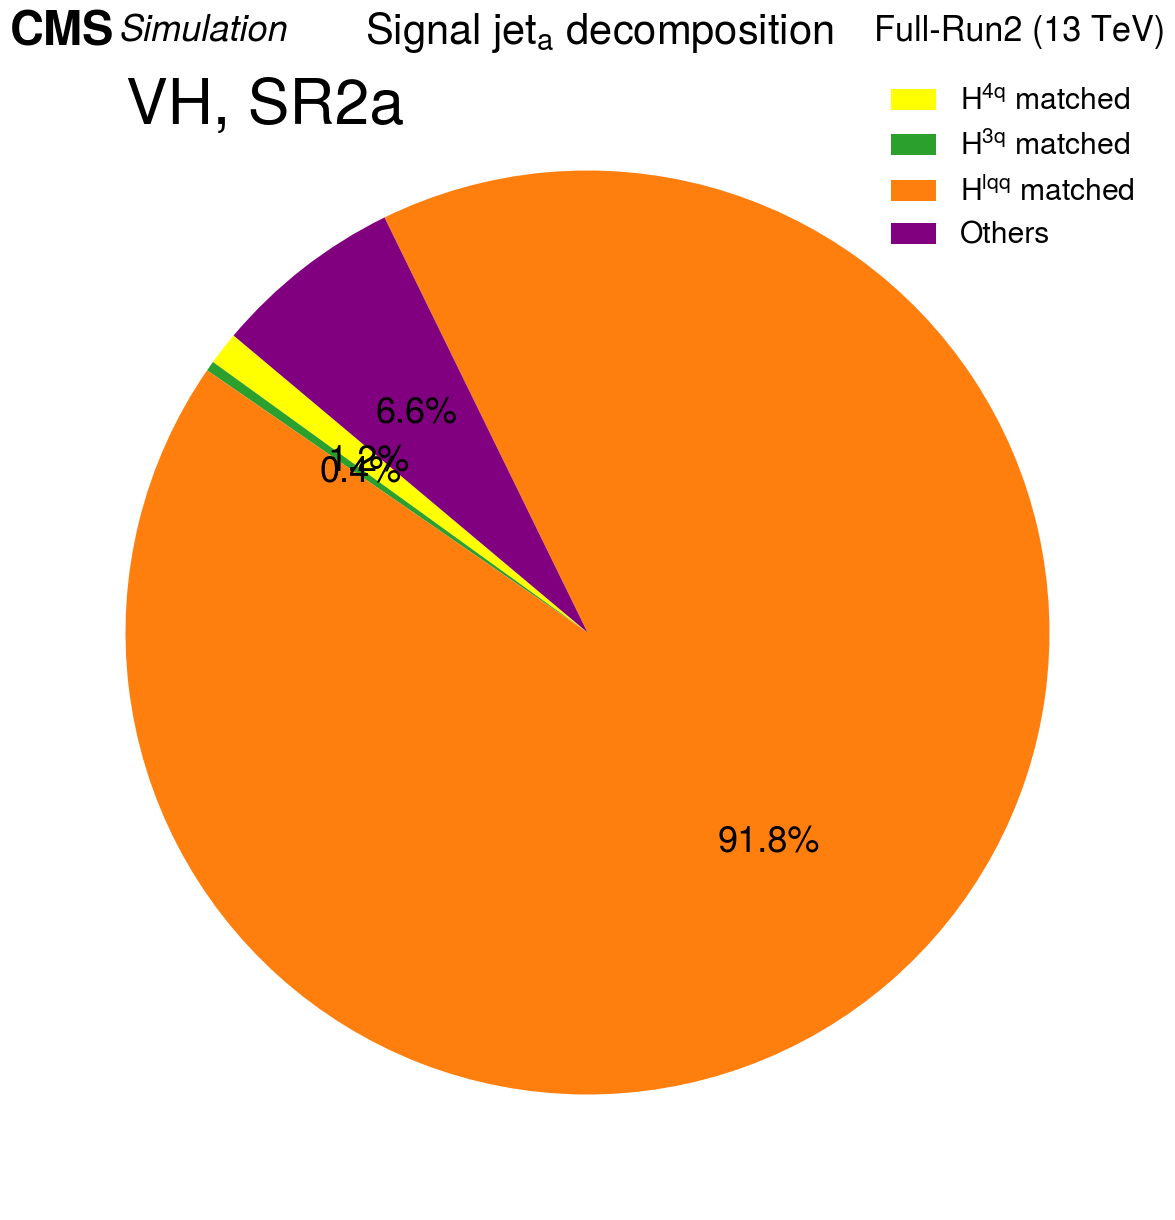

[3.12, 2.62, 2.28, 2.03, 0.0168, 0.16, ... 0.743, 0.839, 2.31, 2.44, 2.99, 0.506]


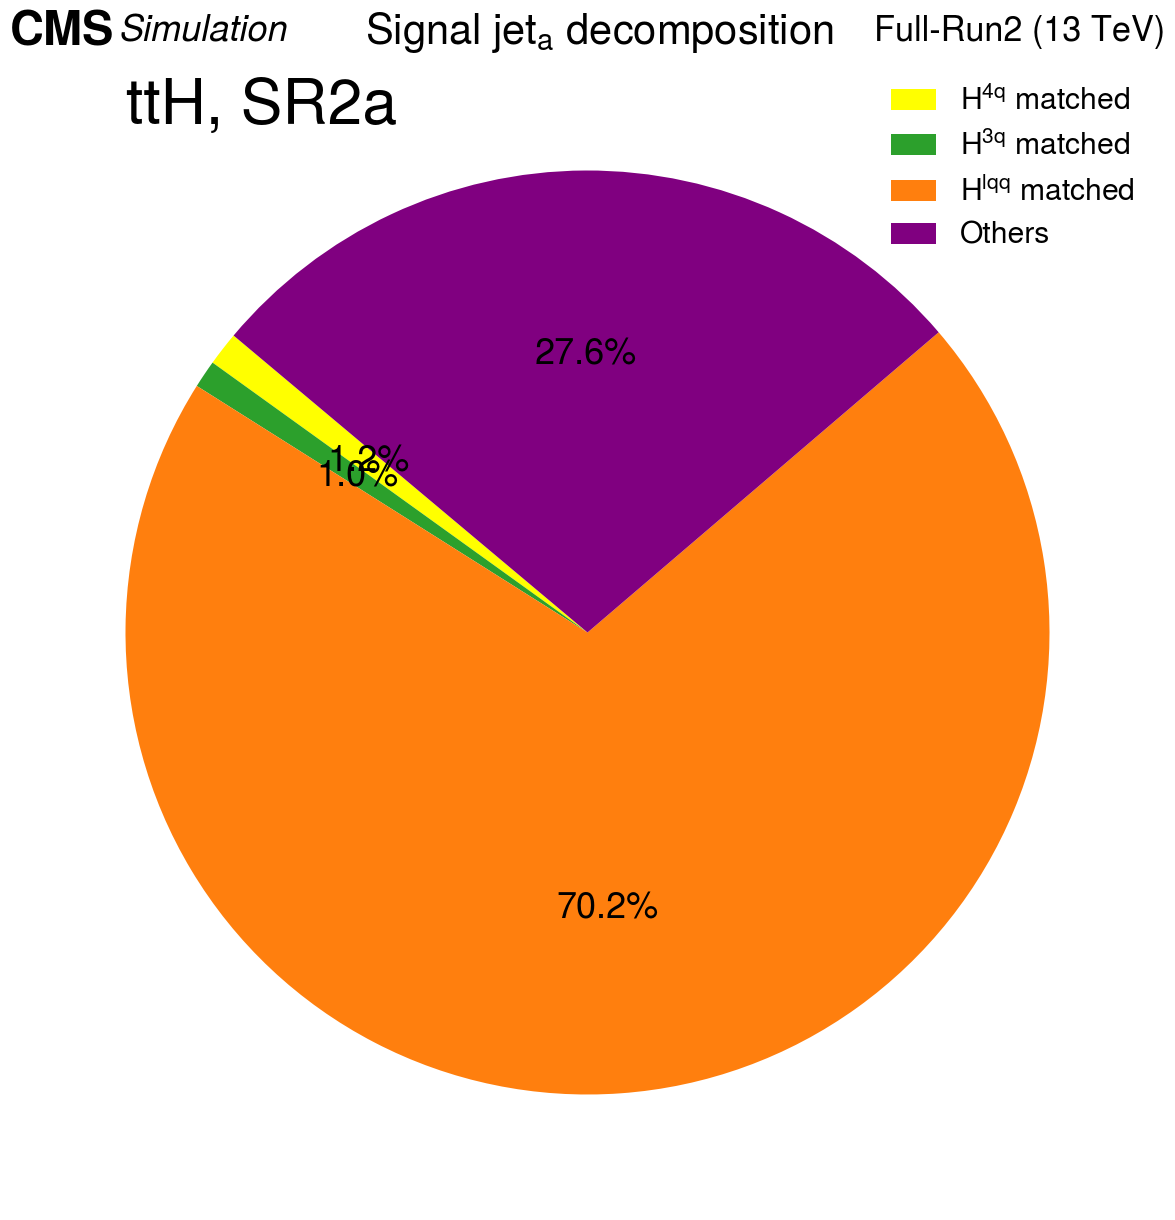

[2.97, 2.31, 0.0849, 0.17, 0.0194, 0.481, ... 1.13, 0.332, 2.5, 2.82, 2.01, 2.45]


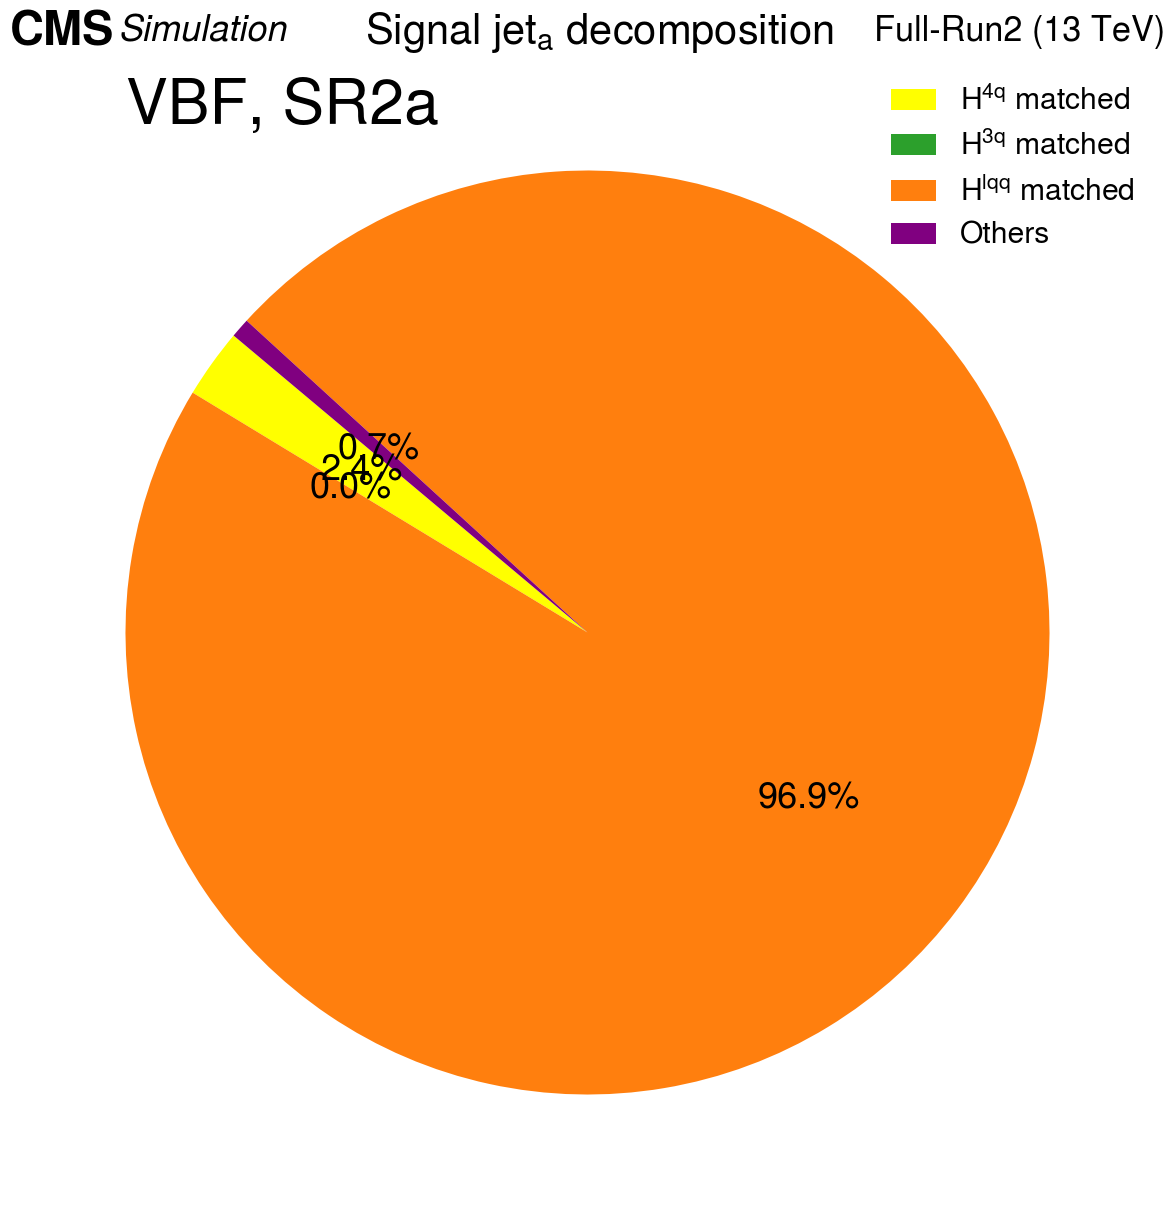

[2.4, 1.87, 3.06, 3.04, 2.91, 1.51, 2.08, ... 3.1, 0.141, 0.273, 0.498, 1.18, 2.73]


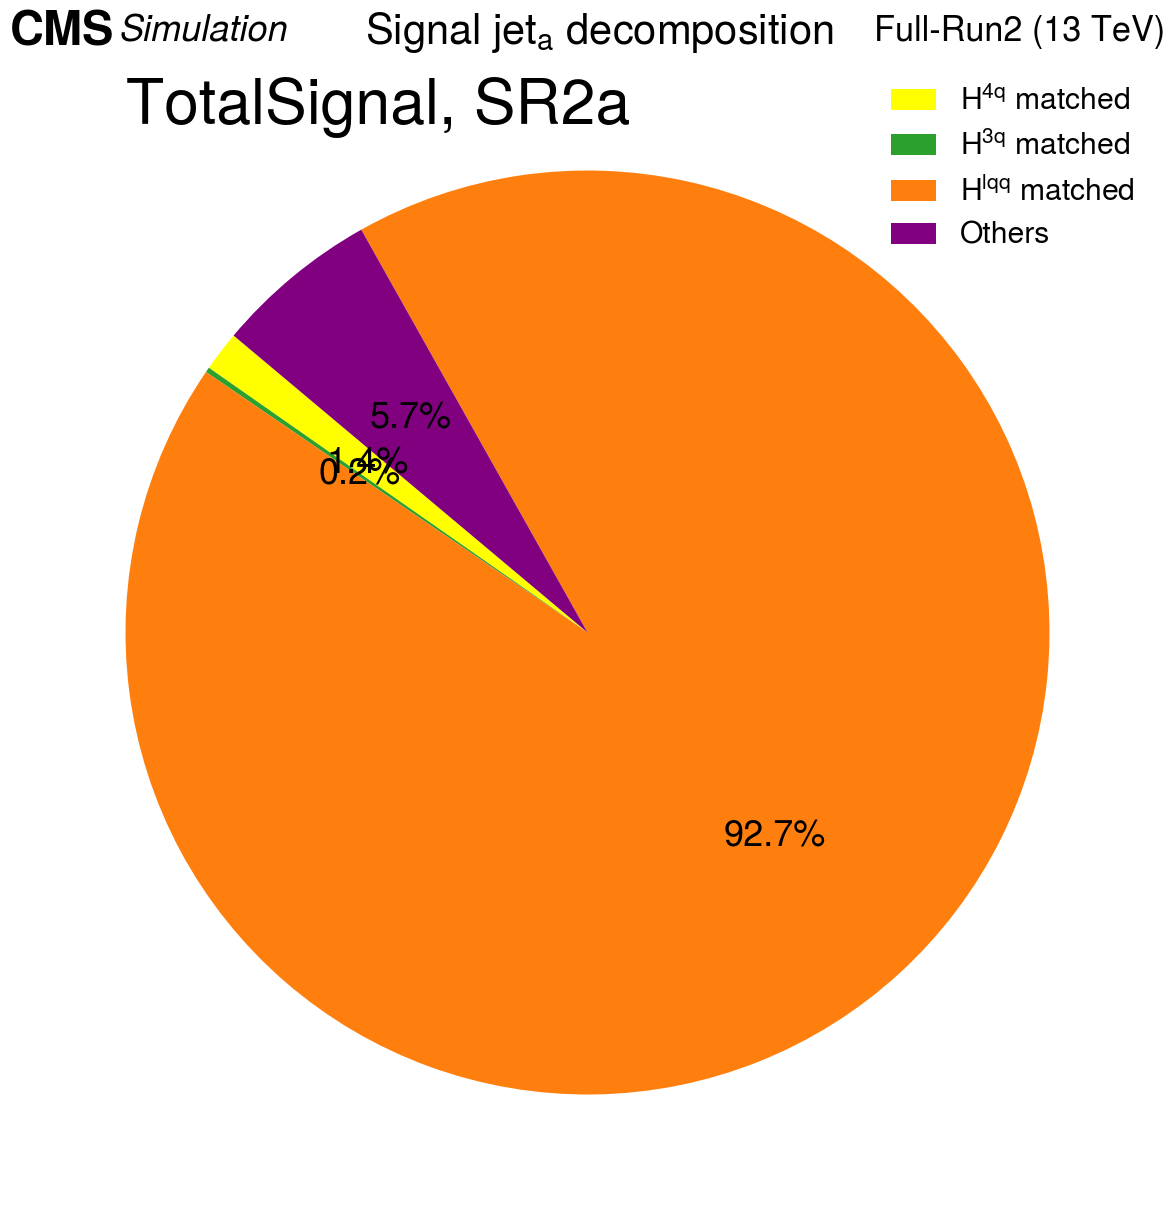

[2.4, 1.87, 3.06, 3.04, 2.91, 1.51, 2.08, ... 3.09, 0.722, 3, 3.11, 3.07, 0.455]


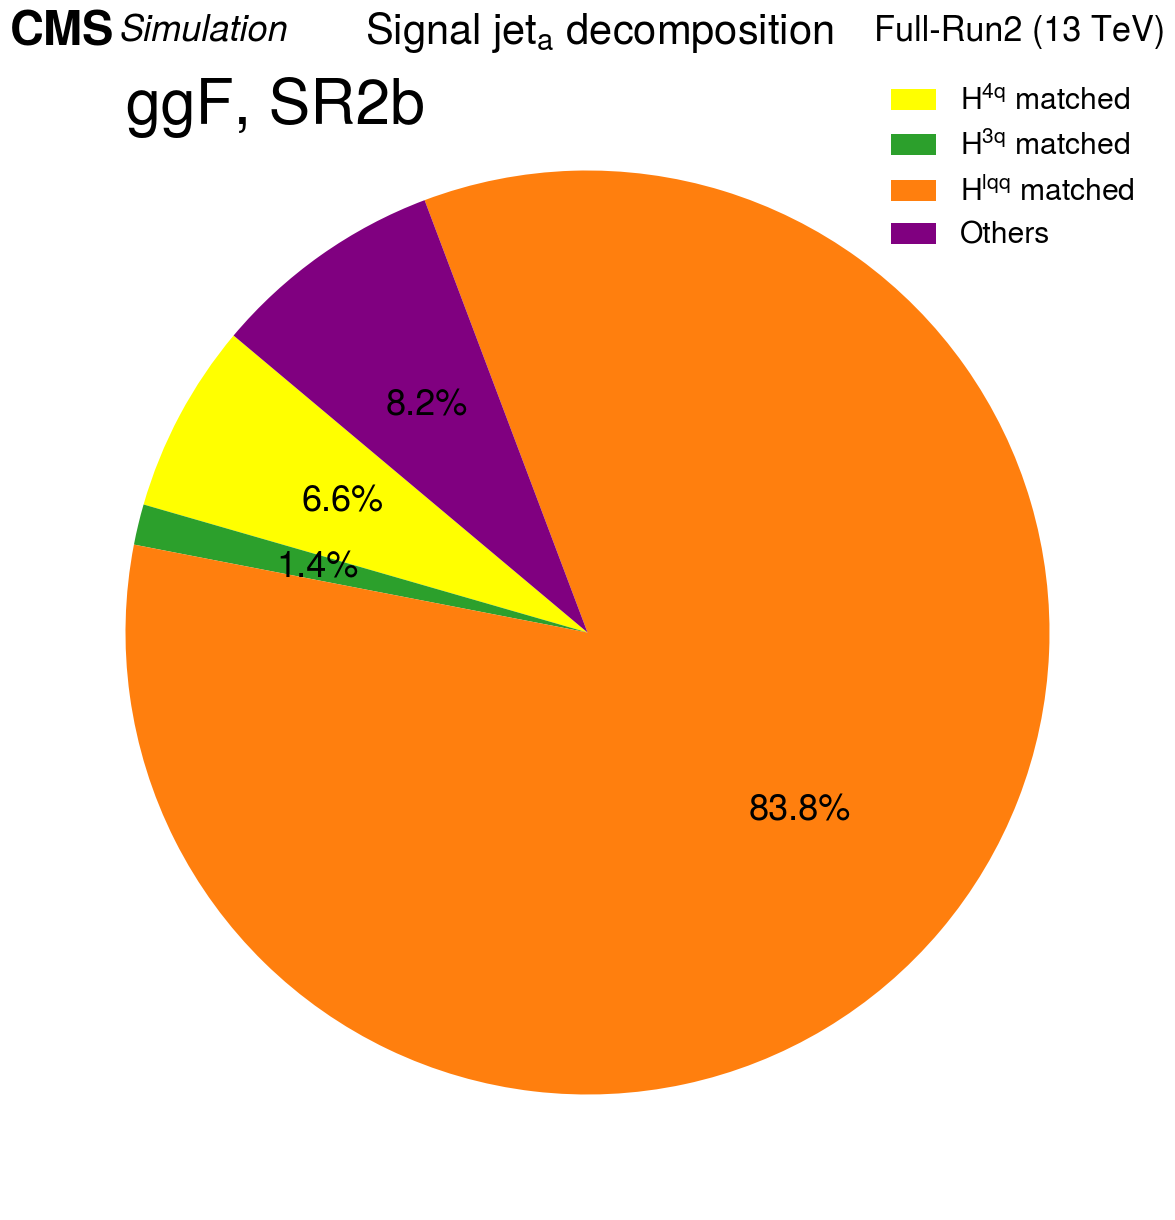

[0.168, 1.39, 2.76, 1.26, 0.0118, 2.83, ... 3.1, 0.141, 0.273, 0.498, 1.18, 2.73]


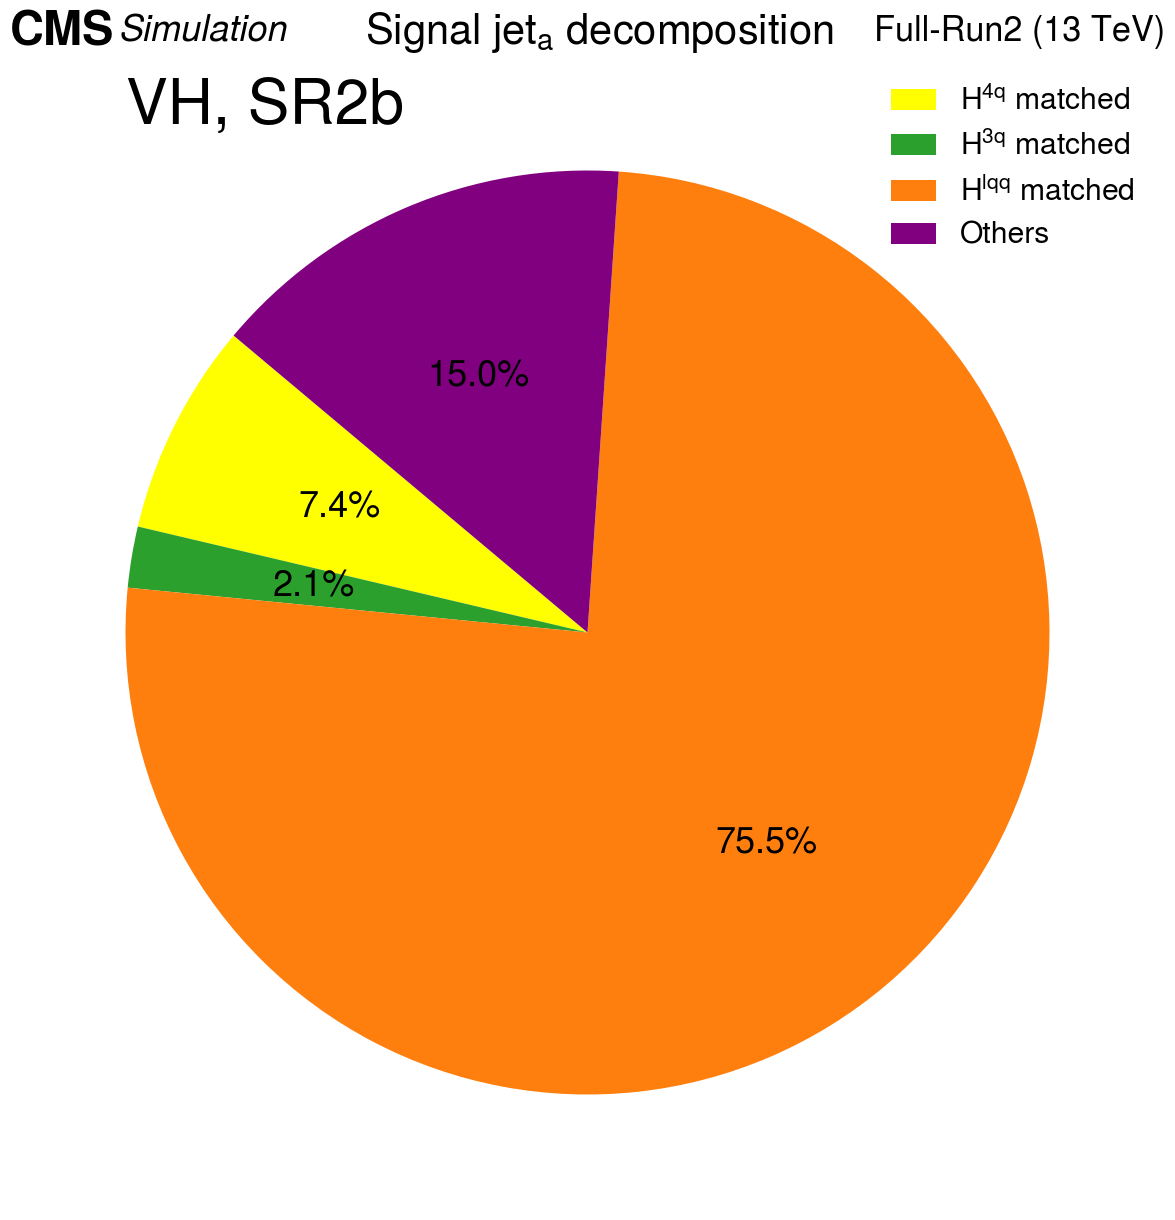

[3.12, 2.62, 2.28, 2.03, 0.0168, 0.16, ... 0.743, 0.839, 2.31, 2.44, 2.99, 0.506]


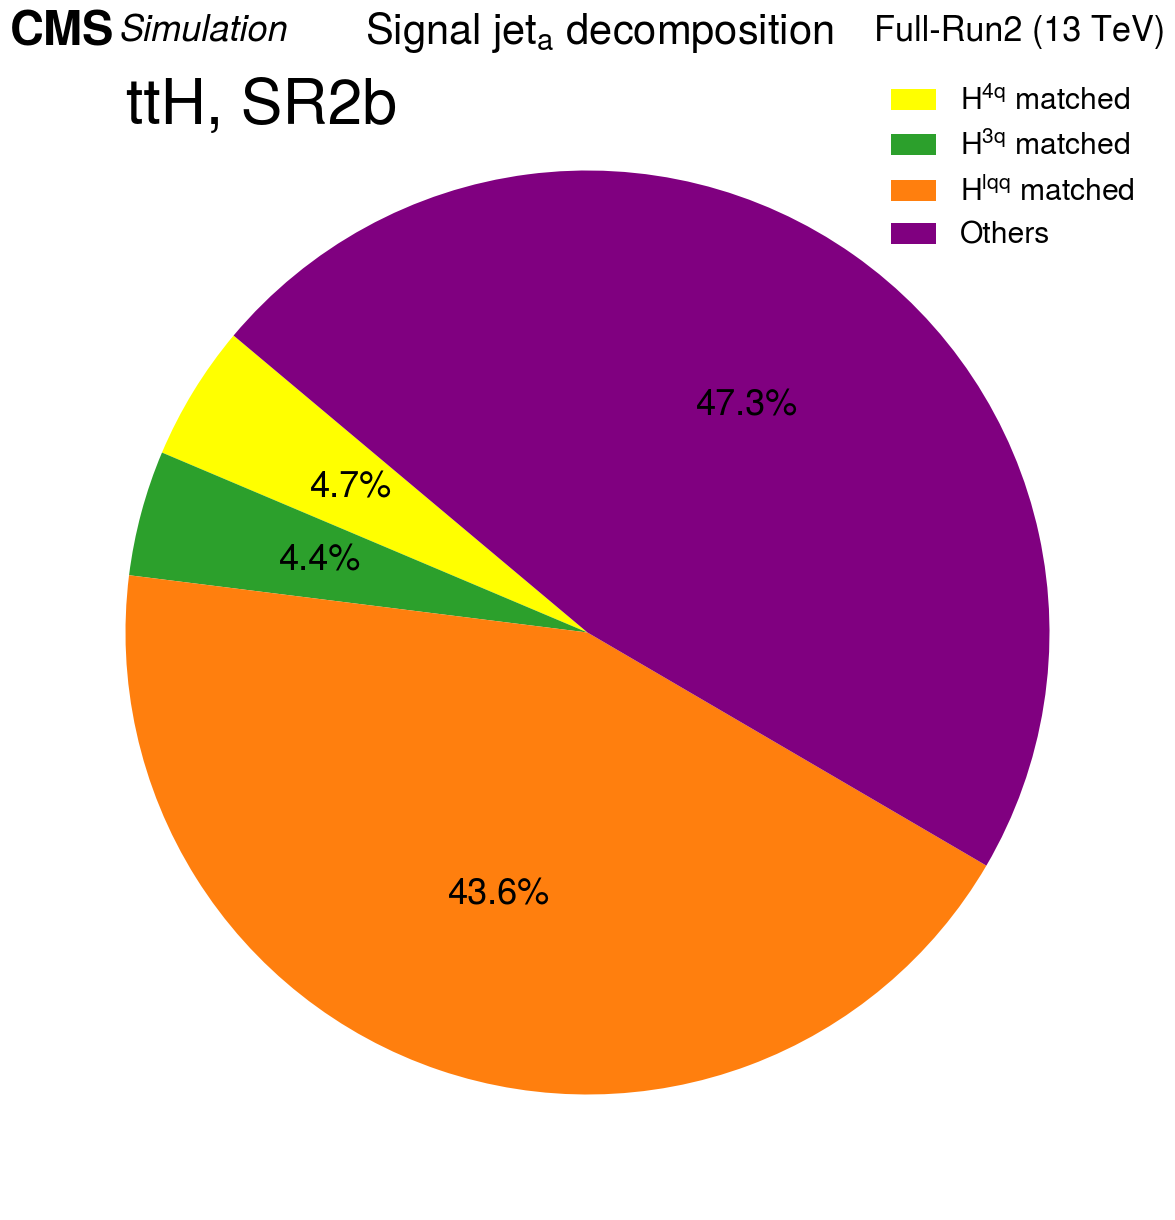

[2.97, 2.31, 0.0849, 0.17, 0.0194, 0.481, ... 1.13, 0.332, 2.5, 2.82, 2.01, 2.45]


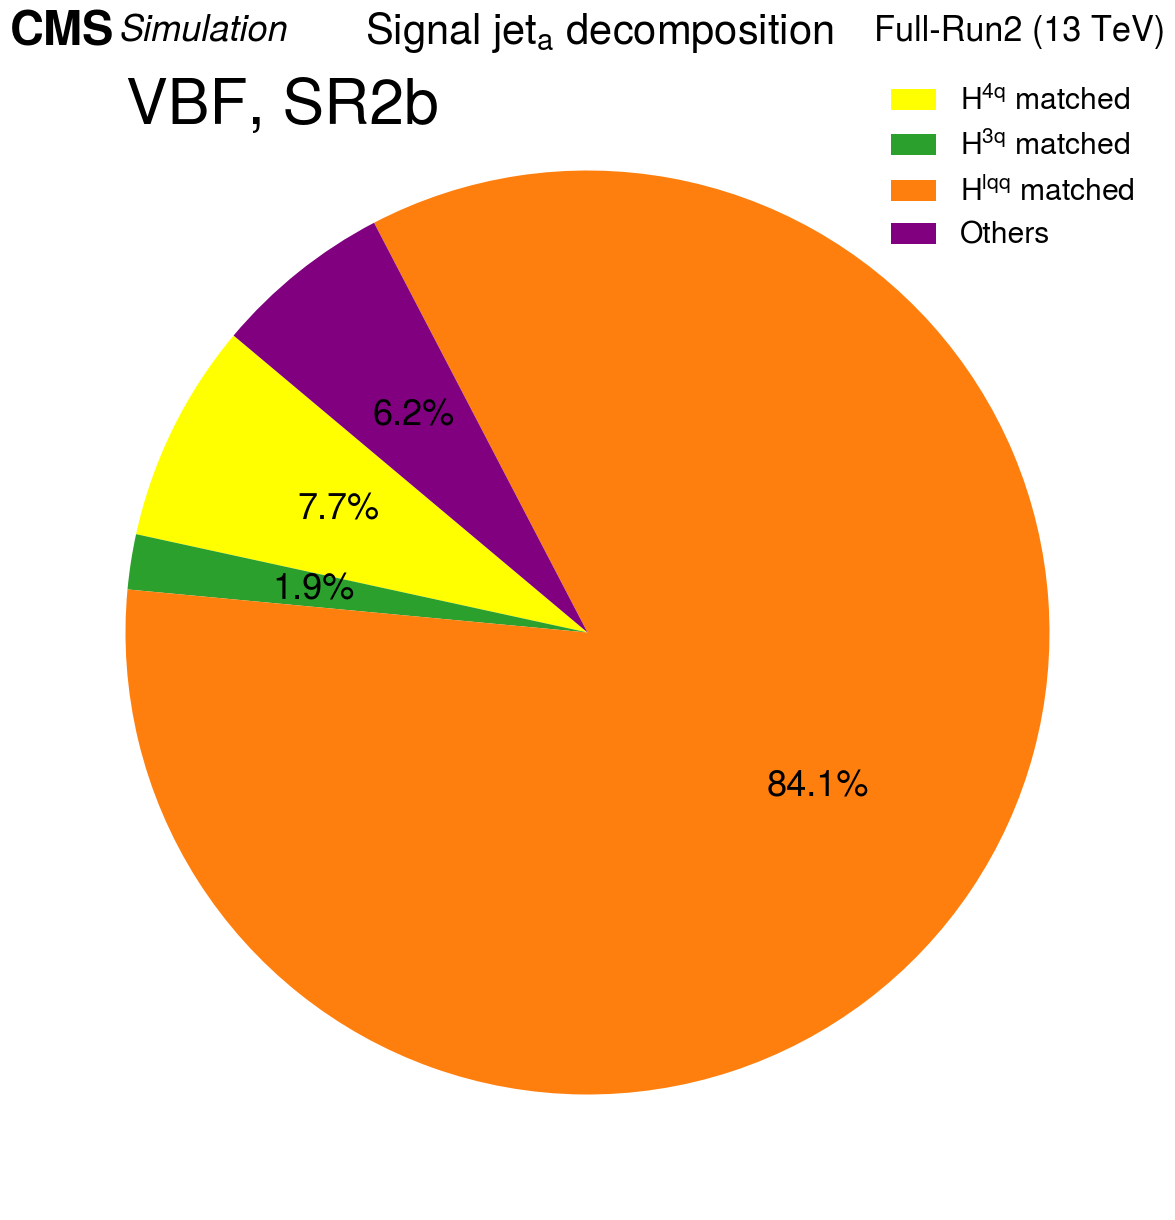

[2.4, 1.87, 3.06, 3.04, 2.91, 1.51, 2.08, ... 3.1, 0.141, 0.273, 0.498, 1.18, 2.73]


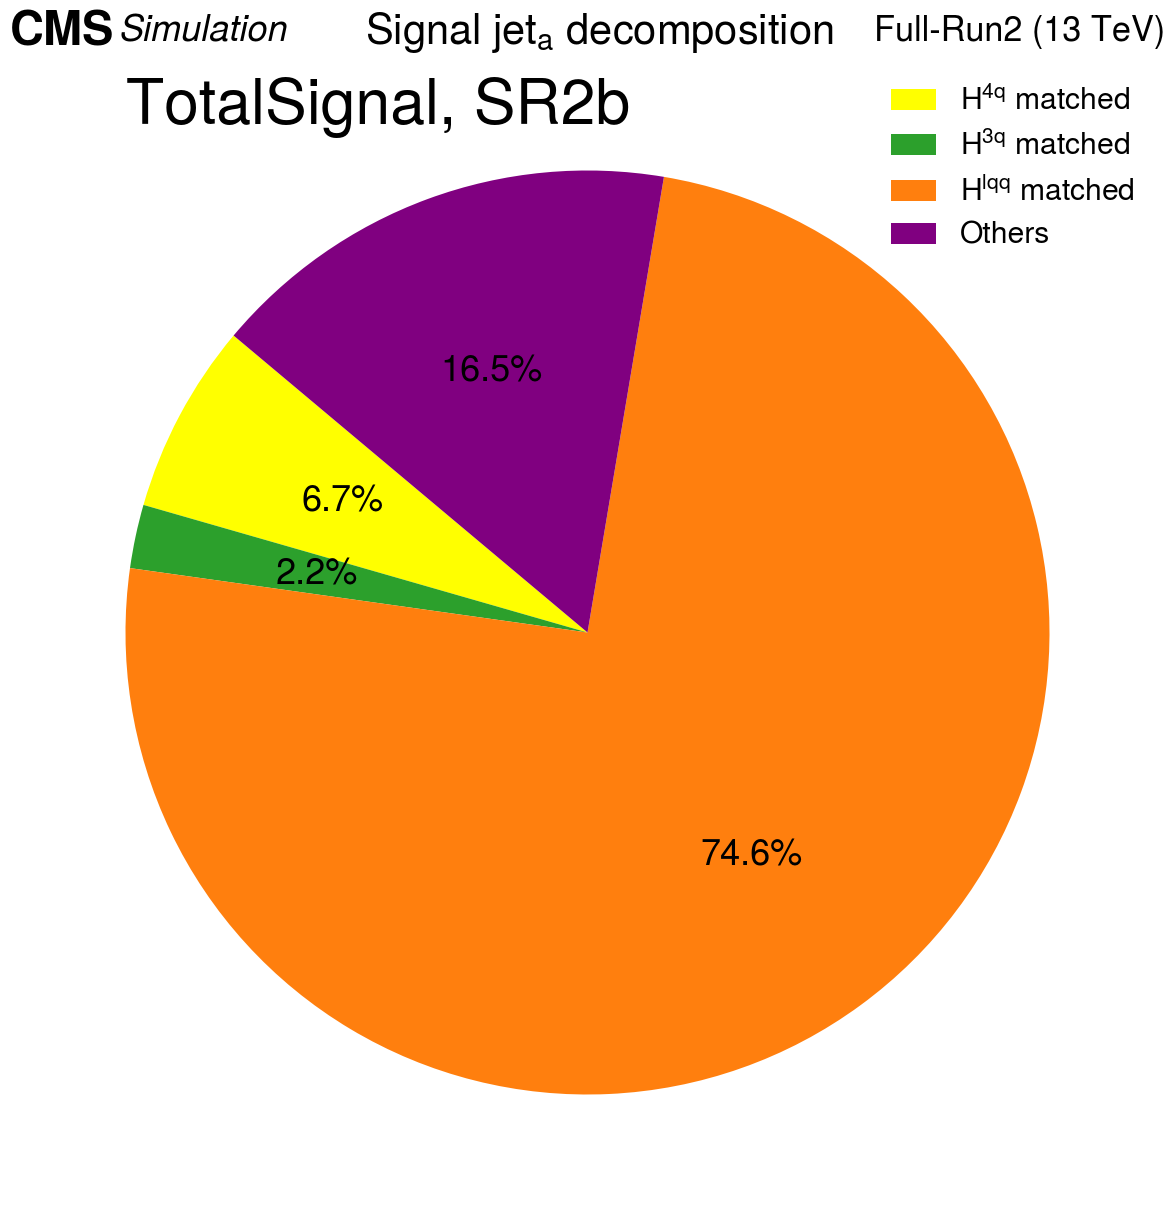

In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import mplhep as hep
import boost_histogram as bh
from cycler import cycler

events_signal = {
        'ggF'         : "/data/bond/zhaoyz/SlimmedTree/V5/Full-Run2/Signal/SlimmedTree_GluGlu.root",
        'VH'          : "/data/bond/zhaoyz/SlimmedTree/V5/Full-Run2/Signal/SlimmedTree_VH.root",   
        'ttH'         : "/data/bond/zhaoyz/SlimmedTree/V5/Full-Run2/Signal/SlimmedTree_ttH.root",
        'VBF'         : "/data/bond/zhaoyz/SlimmedTree/V5/Full-Run2/Signal/SlimmedTree_VBF.root",
        'TotalSignal' : "/data/bond/zhaoyz/SlimmedTree/V5/Full-Run2/Signal/SlimmedTree_Total.root",
}


regions = ["PS","SR1a","SR1b","SR2a","SR2b"]
for region_i in regions:
    for file_name, file_path in events_signal.items():
        use_helvet = False ## true: use helvetica for plots, make sure the system have the font installed
        if use_helvet:
            CMShelvet = hep.style.CMS
            CMShelvet['font.sans-serif'] = ['Helvetica', 'Arial']
            plt.style.use(CMShelvet)
        else:
            plt.style.use(hep.style.CMS)
        plt.figure(figsize=(15,15))
        ax=plt.gca()
        plt.grid()
        hep.cms.label(data=False, year="Full-Run2", ax=ax, fontname='sans-serif')
        %matplotlib inline
        events_pkutree = uproot.lazy({file_path:"PKUTree"})
        get_dphi(events=events_pkutree)
        CUT = {        
            "SR1a" :  (events_pkutree["a_HWW_V2"] > 0.99)   & (events_pkutree["MET_et"]/events_pkutree["PTj_V2_a"] < 0.25),
            "SR1b" :  (events_pkutree["a_HWW_V2"] > 0.92)   & (events_pkutree["a_HWW_V2"] <= 0.99)  & (events_pkutree["MET_et"]/events_pkutree["PTj_V2_a"] < 0.25),
            "SR2a" :  (events_pkutree["DPhi"] < 0.8)        & (events_pkutree["a_HWW_V2"] > 0.99)   & (events_pkutree["MET_et"]/events_pkutree["PTj_V2_a"] >= 0.25),
            "SR2b" :  (events_pkutree["DPhi"] < 0.8)        & (events_pkutree["a_HWW_V2"] > 0.92)   & (events_pkutree["a_HWW_V2"] <= 0.99) & (events_pkutree["MET_et"]/events_pkutree["PTj_V2_a"] >= 0.25),
        }
        region = region_i #can choose SR1a,SR1b...
        if region == "PS":
            pass
        else: events_pkutree = events_pkutree[CUT[region]]

        num1_pkutree = np.sum(events_pkutree[events_pkutree["R4q_a"] == 1]["weight"])
        num2_pkutree = np.sum(events_pkutree[(events_pkutree["R3q_a"] == 1) & (events_pkutree["R3q_taudecay_a"] != 1)]["weight"])
        num3_pkutree = np.sum(events_pkutree[(events_pkutree["Rlqq_a"] == 1) | (events_pkutree["R3q_taudecay_a"] == 1)]["weight"])
        num4_pkutree = np.sum(events_pkutree[(events_pkutree["R4q_a"] != 1) & (events_pkutree["R3q_a"] != 1) & (events_pkutree["Rlqq_a"] != 1) & (events_pkutree["R3q_taudecay_a"] != 1)]["weight"])
        labels = [r'$H^{4q}\ matched$', r'$H^{3q}\ matched$', r'$H^{lqq}\ matched$', r'Others']
        sizes = [num1_pkutree, num2_pkutree, num3_pkutree, num4_pkutree]
        # color
        colors = ['#ffff00', '#2ca02c', '#ff7f0e', '#800080']
        # highlight some component(optional)
        explode = (0., 0, 0, 0)
        # plot the pie chat
        plt.pie(sizes, labels=None, colors=colors, autopct='%1.1f%%', startangle=140, explode=explode)
        plt.legend(labels, loc='upper right')
        # set title
        plt.title(r'$\ \ Signal' + "" + r'\ jet_{a}\ decomposition $',fontsize = 30)
        # title_text = 'Pie Chart Example'
        plt.text(-1,1.1, file_name + ", " + region, fontsize=45)
        path_str = './plots/piechart/22Feb2024'
        if not os.path.exists(path_str):
            os.makedirs(path_str)
        plt.savefig(f"{path_str}/Piechart_"+file_name+region+"_deco.pdf", bbox_inches='tight')
        plt.show()

